# Pipeline

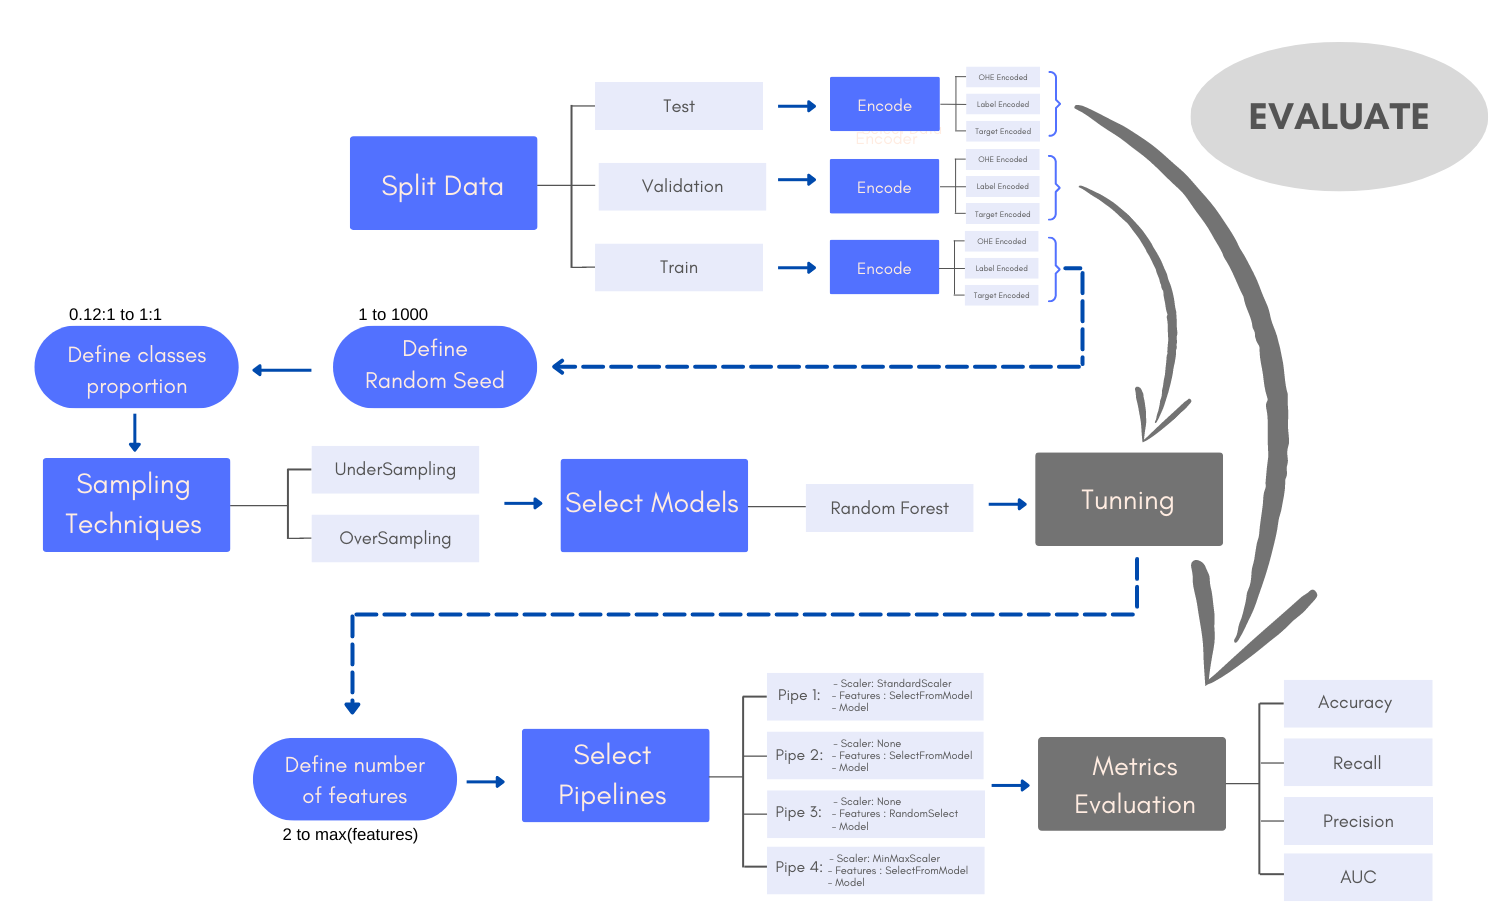

In [138]:
from IPython.display import Image
Image("Pipeline.png")

# Importação de Bibliotecas

In [139]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec


##########################
import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport


#Visualização de dados
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

#Scalers e encoders
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from category_encoders.one_hot import OneHotEncoder
from category_encoders.target_encoder import TargetEncoder


#Balanceamento de dados
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

# Prototipação
from lazypredict.Supervised import LazyClassifier


from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import PredefinedSplit



#ML
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1.0 Leitura dos arquivos

In [140]:
df = pd.read_csv('streamings.csv')
df.head()

Unnamed: 0  Position                          Track Name  \
0           0         1                  Recairei - Ao Vivo   
1           1         2       Basta Você Me Ligar - Ao Vivo   
2           2         3                    Amor ou o Litrão   
3           3         4  Meia Noite (Você tem meu Whatsapp)   
4           4         5                      Investe Em Mim   

                   Artist  Streams  \
0  Os Barões Da Pisadinha  1611265   
1  Os Barões Da Pisadinha  1263779   
2           Petter Ferraz  1181284   
3    Tarcísio do Acordeon  1100935   
4          Jonas Esticado  1052844   

                                                 URL        data  
0  https://open.spotify.com/track/2JTir3y1VuJQmex...  2021-01-01  
1  https://open.spotify.com/track/3rRin3LyLY92kpE...  2021-01-01  
2  https://open.spotify.com/track/7qmnP8Woc47dLSr...  2021-01-01  
3  https://open.spotify.com/track/6sPBi0qLI6KM3yX...  2021-01-01  
4  https://open.spotify.com/track/15k1TDabqSEmyXO...  2021-01-01

In [141]:
df_features = pd.read_csv('audio_features2.csv')
df_features

Unnamed: 0  danceability  energy  key  loudness  mode  speechiness  \
0              0         0.582   0.937   10    -2.118     1       0.0858   
1              1         0.599   0.914    5    -2.415     0       0.0629   
2              2         0.934   0.707    9    -4.214     1       0.0646   
3              3         0.709   0.816   11    -4.787     0       0.0346   
4              4         0.632   0.953    9    -1.283     1       0.0325   
...          ...           ...     ...  ...       ...   ...          ...   
1713        1713         0.616   0.991    9    -2.529     1       0.2320   
1714        1714         0.872   0.845   10    -1.932     1       0.0915   
1715        1715         0.487   0.925    7    -1.817     1       0.0690   
1716        1716         0.556   0.888    5    -2.952     0       0.0916   
1717        1717         0.617   0.865    0    -3.002     1       0.2400   

      acousticness  instrumentalness  liveness  ...  \
0            0.449          0.000000    0.6840  ...   
1            0.500          0.000000    0.6940  ...   
2            0.437          0.000017    0.0628  ...   
3            0.685          0.000000    0.1460  ...   
4            0.317          0.000000    0.1250  ...   
...            ...               ...       ...  ...   
1713         0.113          0.000000    0.2590  ...   
1714         0.533          0.000027    0.0418  ...   
1715         0.280          0.000140    0.2520  ...   
1716         0.465          0.000000    0.8930  ...   
1717         0.378          0.000000    0.6670  ...   

                                       uri  \
0     spotify:track:2JTir3y1VuJQmexiTCMcTP   
1     spotify:track:3rRin3LyLY92kpEbkCgwf4   
2     spotify:track:7qmnP8Woc47dLSrMD5MxL1   
3     spotify:track:6sPBi0qLI6KM3yXX56NxsA   
4     spotify:track:15k1TDabqSEmyXOwMq9RM7   
...                                    ...   
1713  spotify:track:6seovz6cwRWkN1NNAuE2gu   
1714  spotify:track:1OosuFhKograArfZ6JXedk   
1715  spotify:track:1Unc6luL5ueLO3t8I5YtpP   
1716  spotify:track:0FV4eVWzSAglihmcJPECiE   
1717  spotify:track:3mQ0yLH7gV8y7cNhTVRWkS   

                                             track_href  \
0     https://api.spotify.com/v1/tracks/2JTir3y1VuJQ...   
1     https://api.spotify.com/v1/tracks/3rRin3LyLY92...   
2     https://api.spotify.com/v1/tracks/7qmnP8Woc47d...   
3     https://api.spotify.com/v1/tracks/6sPBi0qLI6KM...   
4     https://api.spotify.com/v1/tracks/15k1TDabqSEm...   
...                                                 ...   
1713  https://api.spotify.com/v1/tracks/6seovz6cwRWk...   
1714  https://api.spotify.com/v1/tracks/1OosuFhKogra...   
1715  https://api.spotify.com/v1/tracks/1Unc6luL5ueL...   
1716  https://api.spotify.com/v1/tracks/0FV4eVWzSAgl...   
1717  https://api.spotify.com/v1/tracks/3mQ0yLH7gV8y...   

                                           analysis_url duration_ms  \
0     https://api.spotify.com/v1/audio-analysis/2JTi...      166838   
1     https://api.spotify.com/v1/audio-analysis/3rRi...      182977   
2     https://api.spotify.com/v1/audio-analysis/7qmn...      173913   
3     https://api.spotify.com/v1/audio-analysis/6sPB...      237900   
4     https://api.spotify.com/v1/audio-analysis/15k1...      186533   
...                                                 ...         ...   
1713  https://api.spotify.com/v1/audio-analysis/6seo...      268160   
1714  https://api.spotify.com/v1/audio-analysis/1Oos...      129240   
1715  https://api.spotify.com/v1/audio-analysis/1Unc...      175291   
1716  https://api.spotify.com/v1/audio-analysis/0FV4...      144982   
1717  https://api.spotify.com/v1/audio-analysis/3mQ0...      160858   

     time_signature                                                URL  \
0                 4  https://open.spotify.com/track/2JTir3y1VuJQmex...   
1                 4  https://open.spotify.com/track/3rRin3LyLY92kpE...   
2                 4  https://open.spotify.com/track/7qmnP8Woc47dLSr...   
3                 4  

# 2.0 Pré-processamento

Métrica de popularidade:
- Medir a popularidade diária numero de streams / numero de streams do top 200 do dia
- dividir a popularidade de todas as musicas pela maior popularidade do dia

- Achar data primeiro registro para cada musica
- fazer a média em 4 meses.

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97000 entries, 0 to 96999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  97000 non-null  int64 
 1   Position    97000 non-null  int64 
 2   Track Name  96978 non-null  object
 3   Artist      96978 non-null  object
 4   Streams     97000 non-null  int64 
 5   URL         97000 non-null  object
 6   data        97000 non-null  object
dtypes: int64(3), object(4)
memory usage: 5.2+ MB


## 2.1 Transformando a coluna de data

In [143]:
df['data'] = df['data'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())

In [144]:
#df = df.astype({"data":'date'})

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97000 entries, 0 to 96999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  97000 non-null  int64 
 1   Position    97000 non-null  int64 
 2   Track Name  96978 non-null  object
 3   Artist      96978 non-null  object
 4   Streams     97000 non-null  int64 
 5   URL         97000 non-null  object
 6   data        97000 non-null  object
dtypes: int64(3), object(4)
memory usage: 5.2+ MB


## 2.2 Coletando informações total de streams diárias e número de streams máximo diário.

In [146]:
lista_datas = df.data.unique()
l_datas = list(lista_datas)
l_datas
len(l_datas)

485

In [147]:
# Gravando o total de streams ocorridas diariamente
stream_diaria = []
maxima_stream_diaria = []

for i in l_datas:
    
    stream_diaria.append(df[(df['data']== i)].Streams.sum() )  
    maxima_stream_diaria.append( df[(df['data']== i)].Streams.max() )
    
    
df_aux = pd.DataFrame(list(zip(l_datas, stream_diaria,maxima_stream_diaria )),
               columns =['data', 'stream_diaria', 'maxima_dia'])
df_aux.head()

data  stream_diaria  maxima_dia
0  2021-01-01       64826108     1611265
1  2021-01-02       43141064      873301
2  2021-01-03       41664509      806828
3  2021-01-04       34807998      717103
4  2021-01-05       34675953      715246

In [148]:
df = df.merge(df_aux, how='left', on='data')
df.head()

Unnamed: 0  Position                          Track Name  \
0           0         1                  Recairei - Ao Vivo   
1           1         2       Basta Você Me Ligar - Ao Vivo   
2           2         3                    Amor ou o Litrão   
3           3         4  Meia Noite (Você tem meu Whatsapp)   
4           4         5                      Investe Em Mim   

                   Artist  Streams  \
0  Os Barões Da Pisadinha  1611265   
1  Os Barões Da Pisadinha  1263779   
2           Petter Ferraz  1181284   
3    Tarcísio do Acordeon  1100935   
4          Jonas Esticado  1052844   

                                                 URL        data  \
0  https://open.spotify.com/track/2JTir3y1VuJQmex...  2021-01-01   
1  https://open.spotify.com/track/3rRin3LyLY92kpE...  2021-01-01   
2  https://open.spotify.com/track/7qmnP8Woc47dLSr...  2021-01-01   
3  https://open.spotify.com/track/6sPBi0qLI6KM3yX...  2021-01-01   
4  https://open.spotify.com/track/15k1TDabqSEmyXO...  2021-01-01   

   stream_diaria  maxima_dia  
0       64826108     1611265  
1       64826108     1611265  
2       64826108     1611265  
3       64826108     1611265  
4       64826108     1611265

## 2.3 Calculando popularidade normalizada diária

In [149]:
df['popularidade_diaria_norm'] = df['Streams']/df['maxima_dia']
df.head()

Unnamed: 0  Position                          Track Name  \
0           0         1                  Recairei - Ao Vivo   
1           1         2       Basta Você Me Ligar - Ao Vivo   
2           2         3                    Amor ou o Litrão   
3           3         4  Meia Noite (Você tem meu Whatsapp)   
4           4         5                      Investe Em Mim   

                   Artist  Streams  \
0  Os Barões Da Pisadinha  1611265   
1  Os Barões Da Pisadinha  1263779   
2           Petter Ferraz  1181284   
3    Tarcísio do Acordeon  1100935   
4          Jonas Esticado  1052844   

                                                 URL        data  \
0  https://open.spotify.com/track/2JTir3y1VuJQmex...  2021-01-01   
1  https://open.spotify.com/track/3rRin3LyLY92kpE...  2021-01-01   
2  https://open.spotify.com/track/7qmnP8Woc47dLSr...  2021-01-01   
3  https://open.spotify.com/track/6sPBi0qLI6KM3yX...  2021-01-01   
4  https://open.spotify.com/track/15k1TDabqSEmyXO...  2021-01-01   

   stream_diaria  maxima_dia  popularidade_diaria_norm  
0       64826108     1611265                  1.000000  
1       64826108     1611265                  0.784340  
2       64826108     1611265                  0.733141  
3       64826108     1611265                  0.683274  
4       64826108     1611265                  0.653427

## 2.4 Calculando popularidade média em 4 meses após a entrada nos charts do spotify.

Será registrado apenas as músicas que entraram no charts pela primeira vez em 2021.  
Será contabilizado como 0 streams diário as músicas que entraram em algum momento nos charts do spotify mas não permaneceram no dia considerado

In [150]:
##Definindo lista de musicas unicas
lista_musicas = df.URL.unique()
l_musicas = list(lista_musicas)
l_musicas
len(l_musicas)

1719

In [151]:
#Definindo a janela para 4 meses (120 dias)
n_days = 120
diferenca = timedelta(n_days)
diferenca

datetime.timedelta(days=120)

In [152]:
#Criando looping para calcular a popularidade nos 4 primeiros meses que a musica entrou nos charts
popularidade_media_4m = []
desv_pad_4m = []
l_data_entrada =[]
l_data_final =[]
numero_registros = []

for i in l_musicas:
    
    #Data de entrada no charts
    data_entrada = df[(df['URL']== i)].data.min()

    
    #Data final a considerar o calculo (+120 dias)
    data_final_calculo = data_entrada + diferenca
    
    #Registrar estatísticas apenas caso a musica tenha dado entrada nos charts no ano de 2021.
    if data_entrada.year == 2021:
        
        l_data_entrada.append(data_entrada)
        l_data_final.append(data_final_calculo)
        
        df_filtro = df[(df['data']>= data_entrada) & (df['data']<= data_final_calculo) & (df['URL']== i)]
        
        n_reg = len(df_filtro)
        
        # É contabilizado como 0 streams o dia em que não há registro no top200 do charts, por isso se aplica o fator *n_reg/n_days
        pop_media = df_filtro.popularidade_diaria_norm.mean()*n_reg/n_days
        desv_pad = df_filtro.popularidade_diaria_norm.std()
    
        #Registrando as estatisticas
        popularidade_media_4m.append(pop_media)
        desv_pad_4m.append(desv_pad)
        numero_registros.append(n_reg)


# Transformando em dataframe:
df_aux = pd.DataFrame(list(zip(l_musicas,l_data_entrada,l_data_final,numero_registros, popularidade_media_4m,desv_pad_4m )),
               columns =['URL', 'data_entrada_charts','data_final_4m','n_registros','pop_media_4m', 'pop_desvpad_4m'])
df_aux

URL data_entrada_charts  \
0     https://open.spotify.com/track/2JTir3y1VuJQmex...          2021-01-01   
1     https://open.spotify.com/track/3rRin3LyLY92kpE...          2021-01-01   
2     https://open.spotify.com/track/7qmnP8Woc47dLSr...          2021-01-01   
3     https://open.spotify.com/track/6sPBi0qLI6KM3yX...          2021-01-01   
4     https://open.spotify.com/track/15k1TDabqSEmyXO...          2021-01-01   
...                                                 ...                 ...   
1377  https://open.spotify.com/track/7MJiZazhXeWZoFZ...          2021-12-29   
1378  https://open.spotify.com/track/2AQJRDfQJbfgmTf...          2021-12-31   
1379  https://open.spotify.com/track/67MzL6NnggPqvBf...          2021-12-31   
1380  https://open.spotify.com/track/7uHVSsfgVm7FpG7...          2021-12-31   
1381  https://open.spotify.com/track/1TFqH3zKOiTZoVe...          2021-12-31   

     data_final_4m  n_registros  pop_media_4m  pop_desvpad_4m  
0       2021-05-01          121      0.513341        0.242721  
1       2021-05-01          121      0.471690        0.165304  
2       2021-05-01          121      0.372351        0.231846  
3       2021-05-01          121      0.624558        0.248782  
4       2021-05-01          121      0.395960        0.175088  
...            ...          ...           ...             ...  
1377    2022-04-28           58      0.041164        0.007200  
1378    2022-04-30          121      0.257113        0.045011  
1379    2022-04-30            3      0.002563        0.014767  
1380    2022-04-30           55      0.041144        0.011812  
1381    2022-04-30           36      0.028656        0.017528  

[1382 rows x 6 columns]

Das 1719 músicas coletadas apenas 1382 apareceram nos charts de 2021.

## 2.5 Investigando valores nulos para desvio padrão da popularidade média de 4 meses

In [153]:
df_aux.isnull().sum()

URL                      0
data_entrada_charts      0
data_final_4m            0
n_registros              0
pop_media_4m             0
pop_desvpad_4m         224
dtype: int64

In [154]:
bool_series = pd.isnull(df_aux["pop_desvpad_4m"])

In [155]:
df_aux[bool_series] 

URL data_entrada_charts  \
112   https://open.spotify.com/track/4i9uK1cMwP1Pc5z...          2021-01-01   
141   https://open.spotify.com/track/4nyQshn0cfaRvvn...          2021-01-01   
147   https://open.spotify.com/track/2Zrcs0ePEBsZhsD...          2021-01-01   
151   https://open.spotify.com/track/2bPtwnrpFNEe8N7...          2021-01-01   
159   https://open.spotify.com/track/0gtf3d3byB1LJB8...          2021-01-01   
...                                                 ...                 ...   
1341  https://open.spotify.com/track/2ZbYyDM0pacTwP2...          2021-12-13   
1352  https://open.spotify.com/track/58ySh8QZ67IDkD2...          2021-12-17   
1363  https://open.spotify.com/track/0lizgQ7Qw35od7C...          2021-12-24   
1365  https://open.spotify.com/track/0lLdorYw7lVrJyd...          2021-12-24   
1373  https://open.spotify.com/track/4Z20Nlp53CuArds...          2021-12-25   

     data_final_4m  n_registros  pop_media_4m  pop_desvpad_4m  
112     2021-05-01            1      0.001025             NaN  
141     2021-05-01            1      0.000883             NaN  
147     2021-05-01            1      0.000840             NaN  
151     2021-05-01            1      0.000827             NaN  
159     2021-05-01            1      0.000794             NaN  
...            ...          ...           ...             ...  
1341    2022-04-12            1      0.001029             NaN  
1352    2022-04-16            1      0.001138             NaN  
1363    2022-04-23            1      0.000863             NaN  
1365    2022-04-23            1      0.000794             NaN  
1373    2022-04-24            1      0.000709             NaN  

[224 rows x 6 columns]

In [156]:
df_aux[bool_series].n_registros.value_counts()

1    224
Name: n_registros, dtype: int64

O desvio padrão de popularidade nula ocorreu para musicas com apenas 1 registro na janela específicada.  
A média de popularidade, dessa forma, tende a ser baixa conforme o esperado.

## 2.6 Concatenando caractéristicas e popularidade de músicas
* Características extraidas da WebAPI do Spotify: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-track
* Popularidade calculada de acordo com charts top200 diário do spotify. https://spotifycharts.com/regional/br/daily/latest


In [157]:
df_final = df_features.merge(df_aux, how='left', on='URL')
df_final

Unnamed: 0  danceability  energy  key  loudness  mode  speechiness  \
0              0         0.582   0.937   10    -2.118     1       0.0858   
1              1         0.599   0.914    5    -2.415     0       0.0629   
2              2         0.934   0.707    9    -4.214     1       0.0646   
3              3         0.709   0.816   11    -4.787     0       0.0346   
4              4         0.632   0.953    9    -1.283     1       0.0325   
...          ...           ...     ...  ...       ...   ...          ...   
1713        1713         0.616   0.991    9    -2.529     1       0.2320   
1714        1714         0.872   0.845   10    -1.932     1       0.0915   
1715        1715         0.487   0.925    7    -1.817     1       0.0690   
1716        1716         0.556   0.888    5    -2.952     0       0.0916   
1717        1717         0.617   0.865    0    -3.002     1       0.2400   

      acousticness  instrumentalness  liveness  ...  \
0            0.449          0.000000    0.6840  ...   
1            0.500          0.000000    0.6940  ...   
2            0.437          0.000017    0.0628  ...   
3            0.685          0.000000    0.1460  ...   
4            0.317          0.000000    0.1250  ...   
...            ...               ...       ...  ...   
1713         0.113          0.000000    0.2590  ...   
1714         0.533          0.000027    0.0418  ...   
1715         0.280          0.000140    0.2520  ...   
1716         0.465          0.000000    0.8930  ...   
1717         0.378          0.000000    0.6670  ...   

                                                    URL  popularidade_cantor  \
0     https://open.spotify.com/track/2JTir3y1VuJQmex...                   70   
1     https://open.spotify.com/track/3rRin3LyLY92kpE...                   70   
2     https://open.spotify.com/track/7qmnP8Woc47dLSr...                   41   
3     https://open.spotify.com/track/6sPBi0qLI6KM3yX...                   70   
4     https://open.spotify.com/track/15k1TDabqSEmyXO...                   57   
...                                                 ...                  ...   
1713  https://open.spotify.com/track/6seovz6cwRWkN1N...                   92   
1714  https://open.spotify.com/track/1OosuFhKograArf...                   61   
1715  https://open.spotify.com/track/1Unc6luL5ueLO3t...                   54   
1716  https://open.spotify.com/track/0FV4eVWzSAglihm...                   66   
1717  https://open.spotify.com/track/3mQ0yLH7gV8y7cN...                   46   

     seguidores_cantor                                      genero_cantor  \
0              6220557                            arrocha, forro, piseiro   
1              6220557                            arrocha, forro, piseiro   
2                17837                                                NaN   
3              2665488                                            arrocha   
4              1629840  arrocha, forro, sertanejo, sertanejo pop, sert...   
...                ...                                                ...   
1713          52035117                             k-pop, k-pop boy group   
1714             21191                                       arrochadeira   
1715            194457                       arrochadeira, forro, piseiro   
1716           5264246  funk carioca, pop nacional, sertanejo, sertane...   
1717            326928                                      sertanejo pop   

     genero_primario_cantor data_entrada_charts data_final_4m  n_registros  \
0                   arrocha          2021-01-01    2021-05-01        121.0   
1                   arrocha          2021-01-01    2021-05-01        121.0   
2                       NaN          2021-01-01    2021-05-01        121.0   
3                   arrocha          2021-01-01    2021-05-01        121.0   
4                   arrocha          2021-01-01    2021-05-01        121.0   
...                     ...                 ...           ...          ...   


Exclusão das músicas que entraram nos charts após 2021. Essas musicas não possuem popularidade calculada então:

In [158]:
df_final = df_final.dropna(subset=['pop_media_4m'])
df_final

Unnamed: 0  danceability  energy  key  loudness  mode  speechiness  \
0              0         0.582   0.937   10    -2.118     1       0.0858   
1              1         0.599   0.914    5    -2.415     0       0.0629   
2              2         0.934   0.707    9    -4.214     1       0.0646   
3              3         0.709   0.816   11    -4.787     0       0.0346   
4              4         0.632   0.953    9    -1.283     1       0.0325   
...          ...           ...     ...  ...       ...   ...          ...   
1376        1376         0.829   0.619    1    -0.861     0       0.2040   
1377        1377         0.612   0.661    5    -5.175     0       0.1330   
1378        1378         0.810   0.700    7    -7.154     1       0.0579   
1379        1379         0.941   0.751    2    -2.799     1       0.0973   
1380        1380         0.405   0.829    2    -6.057     1       0.0582   

      acousticness  instrumentalness  liveness  ...  \
0           0.4490          0.000000    0.6840  ...   
1           0.5000          0.000000    0.6940  ...   
2           0.4370          0.000017    0.0628  ...   
3           0.6850          0.000000    0.1460  ...   
4           0.3170          0.000000    0.1250  ...   
...            ...               ...       ...  ...   
1376        0.1860          0.028300    0.1180  ...   
1377        0.1630          0.000000    0.1030  ...   
1378        0.0669          0.000001    0.0749  ...   
1379        0.1540          0.000026    0.0677  ...   
1380        0.6200          0.000046    0.3270  ...   

                                                    URL  popularidade_cantor  \
0     https://open.spotify.com/track/2JTir3y1VuJQmex...                   70   
1     https://open.spotify.com/track/3rRin3LyLY92kpE...                   70   
2     https://open.spotify.com/track/7qmnP8Woc47dLSr...                   41   
3     https://open.spotify.com/track/6sPBi0qLI6KM3yX...                   70   
4     https://open.spotify.com/track/15k1TDabqSEmyXO...                   57   
...                                                 ...                  ...   
1376  https://open.spotify.com/track/7MJiZazhXeWZoFZ...                   51   
1377  https://open.spotify.com/track/2AQJRDfQJbfgmTf...                   75   
1378  https://open.spotify.com/track/67MzL6NnggPqvBf...                   66   
1379  https://open.spotify.com/track/7uHVSsfgVm7FpG7...                   49   
1380  https://open.spotify.com/track/1TFqH3zKOiTZoVe...                   71   

     seguidores_cantor                                      genero_cantor  \
0              6220557                            arrocha, forro, piseiro   
1              6220557                            arrocha, forro, piseiro   
2                17837                                                NaN   
3              2665488                                            arrocha   
4              1629840  arrocha, forro, sertanejo, sertanejo pop, sert...   
...                ...                                                ...   
1376              6640                                           funk mtg   
1377           5429554      r&b brasileiro, rap cearense, trap brasileiro   
1378             89158                                          rave funk   
1379             91351                              arrocha, arrochadeira   
1380           1894024                                pagode, pagode novo   

     genero_primario_cantor data_entrada_charts data_final_4m  n_registros  \
0                   arrocha          2021-01-01    2021-05-01        121.0   
1                   arrocha          2021-01-01    2021-05-01        121.0   
2                       NaN          2021-01-01    2021-05-01        121.0   
3                   arrocha          2021-01-01    2021-05-01        121.0   
4                   arrocha          2021-01-01    2021-05-01        121.0   
...                     ...                 ...           ...          ...   


## 2.7 Checando valores nulos no dataframe final:

In [159]:
df_final.isnull().sum()

Unnamed: 0                  0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
type                        0
id                          0
uri                         0
track_href                  0
analysis_url                0
duration_ms                 0
time_signature              0
URL                         0
popularidade_cantor         0
seguidores_cantor           0
genero_cantor              49
genero_primario_cantor     49
data_entrada_charts         0
data_final_4m               0
n_registros                 0
pop_media_4m                0
pop_desvpad_4m            223
dtype: int64

## 2.8 Estatísticas descritivas

In [160]:
df_final.describe()

Unnamed: 0  danceability       energy          key     loudness  \
count  1381.000000   1381.000000  1381.000000  1381.000000  1381.000000   
mean    690.000000      0.670534     0.679165     5.360608    -5.619235   
std     398.804672      0.134604     0.172006     3.548874     2.657069   
min       0.000000      0.161000     0.022900     0.000000   -28.325000   
25%     345.000000      0.594000     0.564000     2.000000    -6.999000   
50%     690.000000      0.672000     0.700000     6.000000    -5.260000   
75%    1035.000000      0.762000     0.815000     8.000000    -3.846000   
max    1380.000000      0.964000     0.986000    11.000000     1.906000   

              mode  speechiness  acousticness  instrumentalness     liveness  \
count  1381.000000  1381.000000   1381.000000       1381.000000  1381.000000   
mean      0.558291     0.106225      0.344591          0.009505     0.240155   
std       0.496770     0.105523      0.235599          0.071811     0.232130   
min       0.000000     0.024800      0.000110          0.000000     0.013400   
25%       0.000000     0.043100      0.152000          0.000000     0.095900   
50%       1.000000     0.062700      0.317000          0.000000     0.132000   
75%       1.000000     0.122000      0.524000          0.000006     0.313000   
max       1.000000     0.879000      0.974000          0.971000     0.989000   

           valence        tempo    duration_ms  time_signature  \
count  1381.000000  1381.000000    1381.000000     1381.000000   
mean      0.616318   130.027742  189726.995655        3.986966   
std       0.233127    28.625400   60175.066381        0.282029   
min       0.032000    52.989000   37801.000000        1.000000   
25%       0.450000   109.991000  158531.000000        4.000000   
50%       0.637000   129.999000  177813.000000        4.000000   
75%       0.808000   153.248000  206182.000000        4.000000   
max       0.975000   204.319000  744727.000000        5.000000   

       popularidade_cantor  seguidores_cantor  n_registros  pop_media_4m  \
count          1381.000000       1.381000e+03  1381.000000   1381.000000   
mean             69.860246       1.141997e+07    45.526430      0.087402   
std              13.257648       1.752331e+07    46.457931      0.138763   
min               0.000000       1.150000e+02     1.000000      0.000553   
25%              62.000000       6.787140e+05     3.000000      0.003138   
50%              70.000000       3.331767e+06    23.000000      0.024037   
75%              80.000000       1.637628e+07    91.000000      0.110264   
max             100.000000       9.961204e+07   121.000000      0.819723   

       pop_desvpad_4m  
count     1158.000000  
mean         0.048057  
std          0.051608  
min          0.000019  
25%          0.014671  
50%          0.028391  
75%          0.061643  
max          0.327077

# 3.0 Analise de dados e definição de musicas populares

Como definir uma musica popular?  
 - Classificar musicas popularidade em 25,50,75,100 percentis e verificar o comportamento da popularidade normalizada ao longo do tempo nas charts.  
 
 Gráfico de distribuição popularidade de musicas;  
 Distribuição caracteristicas de acordo com o que considerar popular (labels)  


## 3.1 Correlação

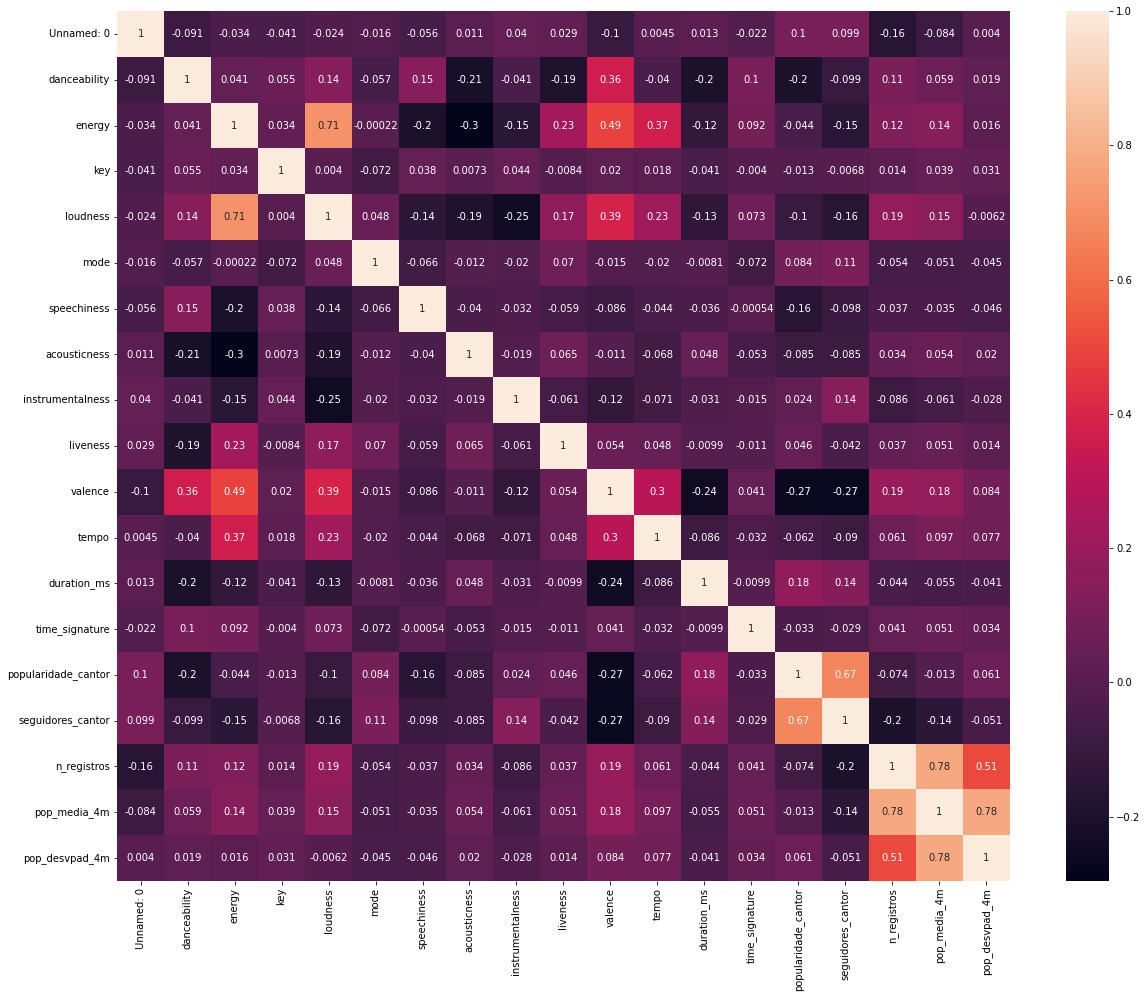

In [161]:
plt.figure(figsize=(20,16))
sns.heatmap(df_final.corr(),annot=True)
plt.show()

Há baixa correlação entre a variável alvo e as características, sendo o máximo observado de 0.19 entre popularidade e valence da música;

É importante ressaltar que as variáveis "n_registros" e "desv_pad" da popularidade foram calculados a partir dos charts do spotify, portanto, não será usado no modelo.

## 3.2 Quartis e percentis

In [162]:
print('Quartil 25%: {}' .format(df_final.quantile(0.25, numeric_only=True).pop_media_4m));
print('Quartil 50%: {}' .format(df_final.quantile(0.5, numeric_only=True).pop_media_4m));
print('Quartil 75%: {}' .format(df_final.quantile(0.75, numeric_only=True).pop_media_4m));
print('Percentil 90%: {}' .format(df_final.quantile(0.9, numeric_only=True).pop_media_4m));

Quartil 25%: 0.0031375944094730415
Quartil 50%: 0.024036977377076194
Quartil 75%: 0.1102641089322164
Percentil 90%: 0.25711297294115504


1º Quartil: pop <= 0.0031375944094730415;  
2º Quartil: 0.0031375944094730415 < pop <= 0.024036977377076194;  
3º Quartil: 0.024036977377076194 < pop <= 0.1102641089322164;  
4º Quartil: pop > 0.1102641089322164

## 3.3 Definição de musica popular: Percentil 90%

Definiremos o percentil de 90% como musicas populares com label = 1

In [163]:
df_analise = df_final.copy()
df_analise['classe'] = 'NaN'

for index, row in df_analise.iterrows():
        
    #if row['pop_media_4m'] <= 0.0031375944094730415:
        #df_analise.loc[index,'classe'] =  0
   #elif row['pop_media_4m'] > 0.0031375944094730415 and row['pop_media_4m'] <= 0.024036977377076194:
        #df_analise.loc[index,'classe'] =  0
    #elif row['pop_media_4m'] > 0.024036977377076194 and row['pop_media_4m'] <= 0.1102641089322164:
        #df_analise.loc[index,'classe'] =  0
    #elif row['pop_media_4m'] > 0.1102641089322164:
        #df_analise.loc[index,'classe'] =  1
        
    if row['pop_media_4m'] >= 0.25711297294115504:
        df_analise.loc[index,'classe'] =  1
    else:
        df_analise.loc[index,'classe'] =  0
         
df_analise

Unnamed: 0  danceability  energy  key  loudness  mode  speechiness  \
0              0         0.582   0.937   10    -2.118     1       0.0858   
1              1         0.599   0.914    5    -2.415     0       0.0629   
2              2         0.934   0.707    9    -4.214     1       0.0646   
3              3         0.709   0.816   11    -4.787     0       0.0346   
4              4         0.632   0.953    9    -1.283     1       0.0325   
...          ...           ...     ...  ...       ...   ...          ...   
1376        1376         0.829   0.619    1    -0.861     0       0.2040   
1377        1377         0.612   0.661    5    -5.175     0       0.1330   
1378        1378         0.810   0.700    7    -7.154     1       0.0579   
1379        1379         0.941   0.751    2    -2.799     1       0.0973   
1380        1380         0.405   0.829    2    -6.057     1       0.0582   

      acousticness  instrumentalness  liveness  ...  popularidade_cantor  \
0           0.4490          0.000000    0.6840  ...                   70   
1           0.5000          0.000000    0.6940  ...                   70   
2           0.4370          0.000017    0.0628  ...                   41   
3           0.6850          0.000000    0.1460  ...                   70   
4           0.3170          0.000000    0.1250  ...                   57   
...            ...               ...       ...  ...                  ...   
1376        0.1860          0.028300    0.1180  ...                   51   
1377        0.1630          0.000000    0.1030  ...                   75   
1378        0.0669          0.000001    0.0749  ...                   66   
1379        0.1540          0.000026    0.0677  ...                   49   
1380        0.6200          0.000046    0.3270  ...                   71   

      seguidores_cantor                                      genero_cantor  \
0               6220557                            arrocha, forro, piseiro   
1               6220557                            arrocha, forro, piseiro   
2                 17837                                                NaN   
3               2665488                                            arrocha   
4               1629840  arrocha, forro, sertanejo, sertanejo pop, sert...   
...                 ...                                                ...   
1376               6640                                           funk mtg   
1377            5429554      r&b brasileiro, rap cearense, trap brasileiro   
1378              89158                                          rave funk   
1379              91351                              arrocha, arrochadeira   
1380            1894024                                pagode, pagode novo   

     genero_primario_cantor data_entrada_charts data_final_4m n_registros  \
0                   arrocha          2021-01-01    2021-05-01       121.0   
1                   arrocha          2021-01-01    2021-05-01       121.0   
2                       NaN          2021-01-01    2021-05-01       121.0   
3                   arrocha          2021-01-01    2021-05-01       121.0   
4                   arrocha          2021-01-01    2021-05-01       121.0   
...                     ...                 ...           ...         ...   
1376               funk mtg          2021-12-29    2022-04-28        58.0   
1377         r&b brasileiro          2021-12-31    2022-04-30       121.0   
1378              rave funk          2021-12-31    2022-04-30         3.0   
1379                arrocha          2021-12-31    2022-04-30        55.0   
1380                 pagode          2021-12-31    2022-04-30        36.0   

      pop_media_4m  pop_desvpad_4m classe  
0         0.513341        0.242721      1  
1         0.471690        0.165304      1  
2         0.372351        0.231846      1  
3         0.624558        0.248782      1  
4         0.395960        0.175088      1  
...            ...             ...    ...  
1376      

In [164]:
df_analise['classe'].value_counts()

0    1242
1     139
Name: classe, dtype: int64

139 musicas serão consideradas populares

# 3.4 Histogramas

In [165]:
df_analise.columns

Index(['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'URL', 'popularidade_cantor',
       'seguidores_cantor', 'genero_cantor', 'genero_primario_cantor',
       'data_entrada_charts', 'data_final_4m', 'n_registros', 'pop_media_4m',
       'pop_desvpad_4m', 'classe'],
      dtype='object')

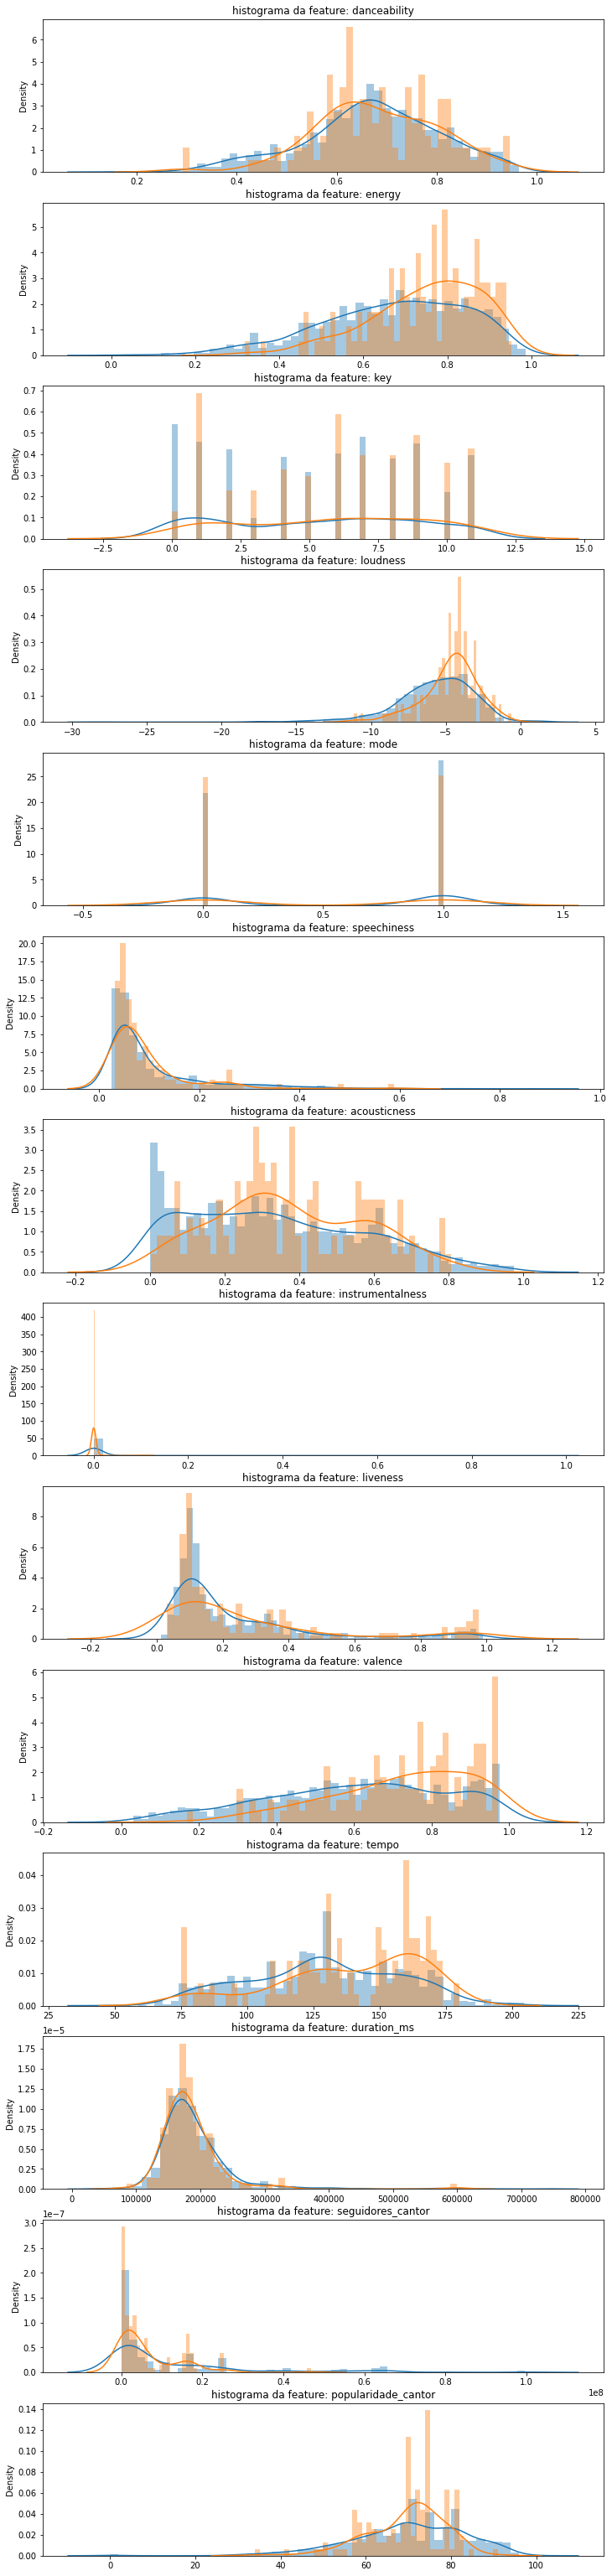

In [166]:
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings("ignore")

features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms','seguidores_cantor','popularidade_cantor']

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)

for i, cn in enumerate(df_analise[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df_analise[cn][df_analise.classe == 0], bins=50)
    sns.distplot(df_analise[cn][df_analise.classe == 1], bins=50)
    ax.set_xlabel('')
    ax.set_title('histograma da feature: ' + str(cn))
plt.show()

## 3.5 Pairplots

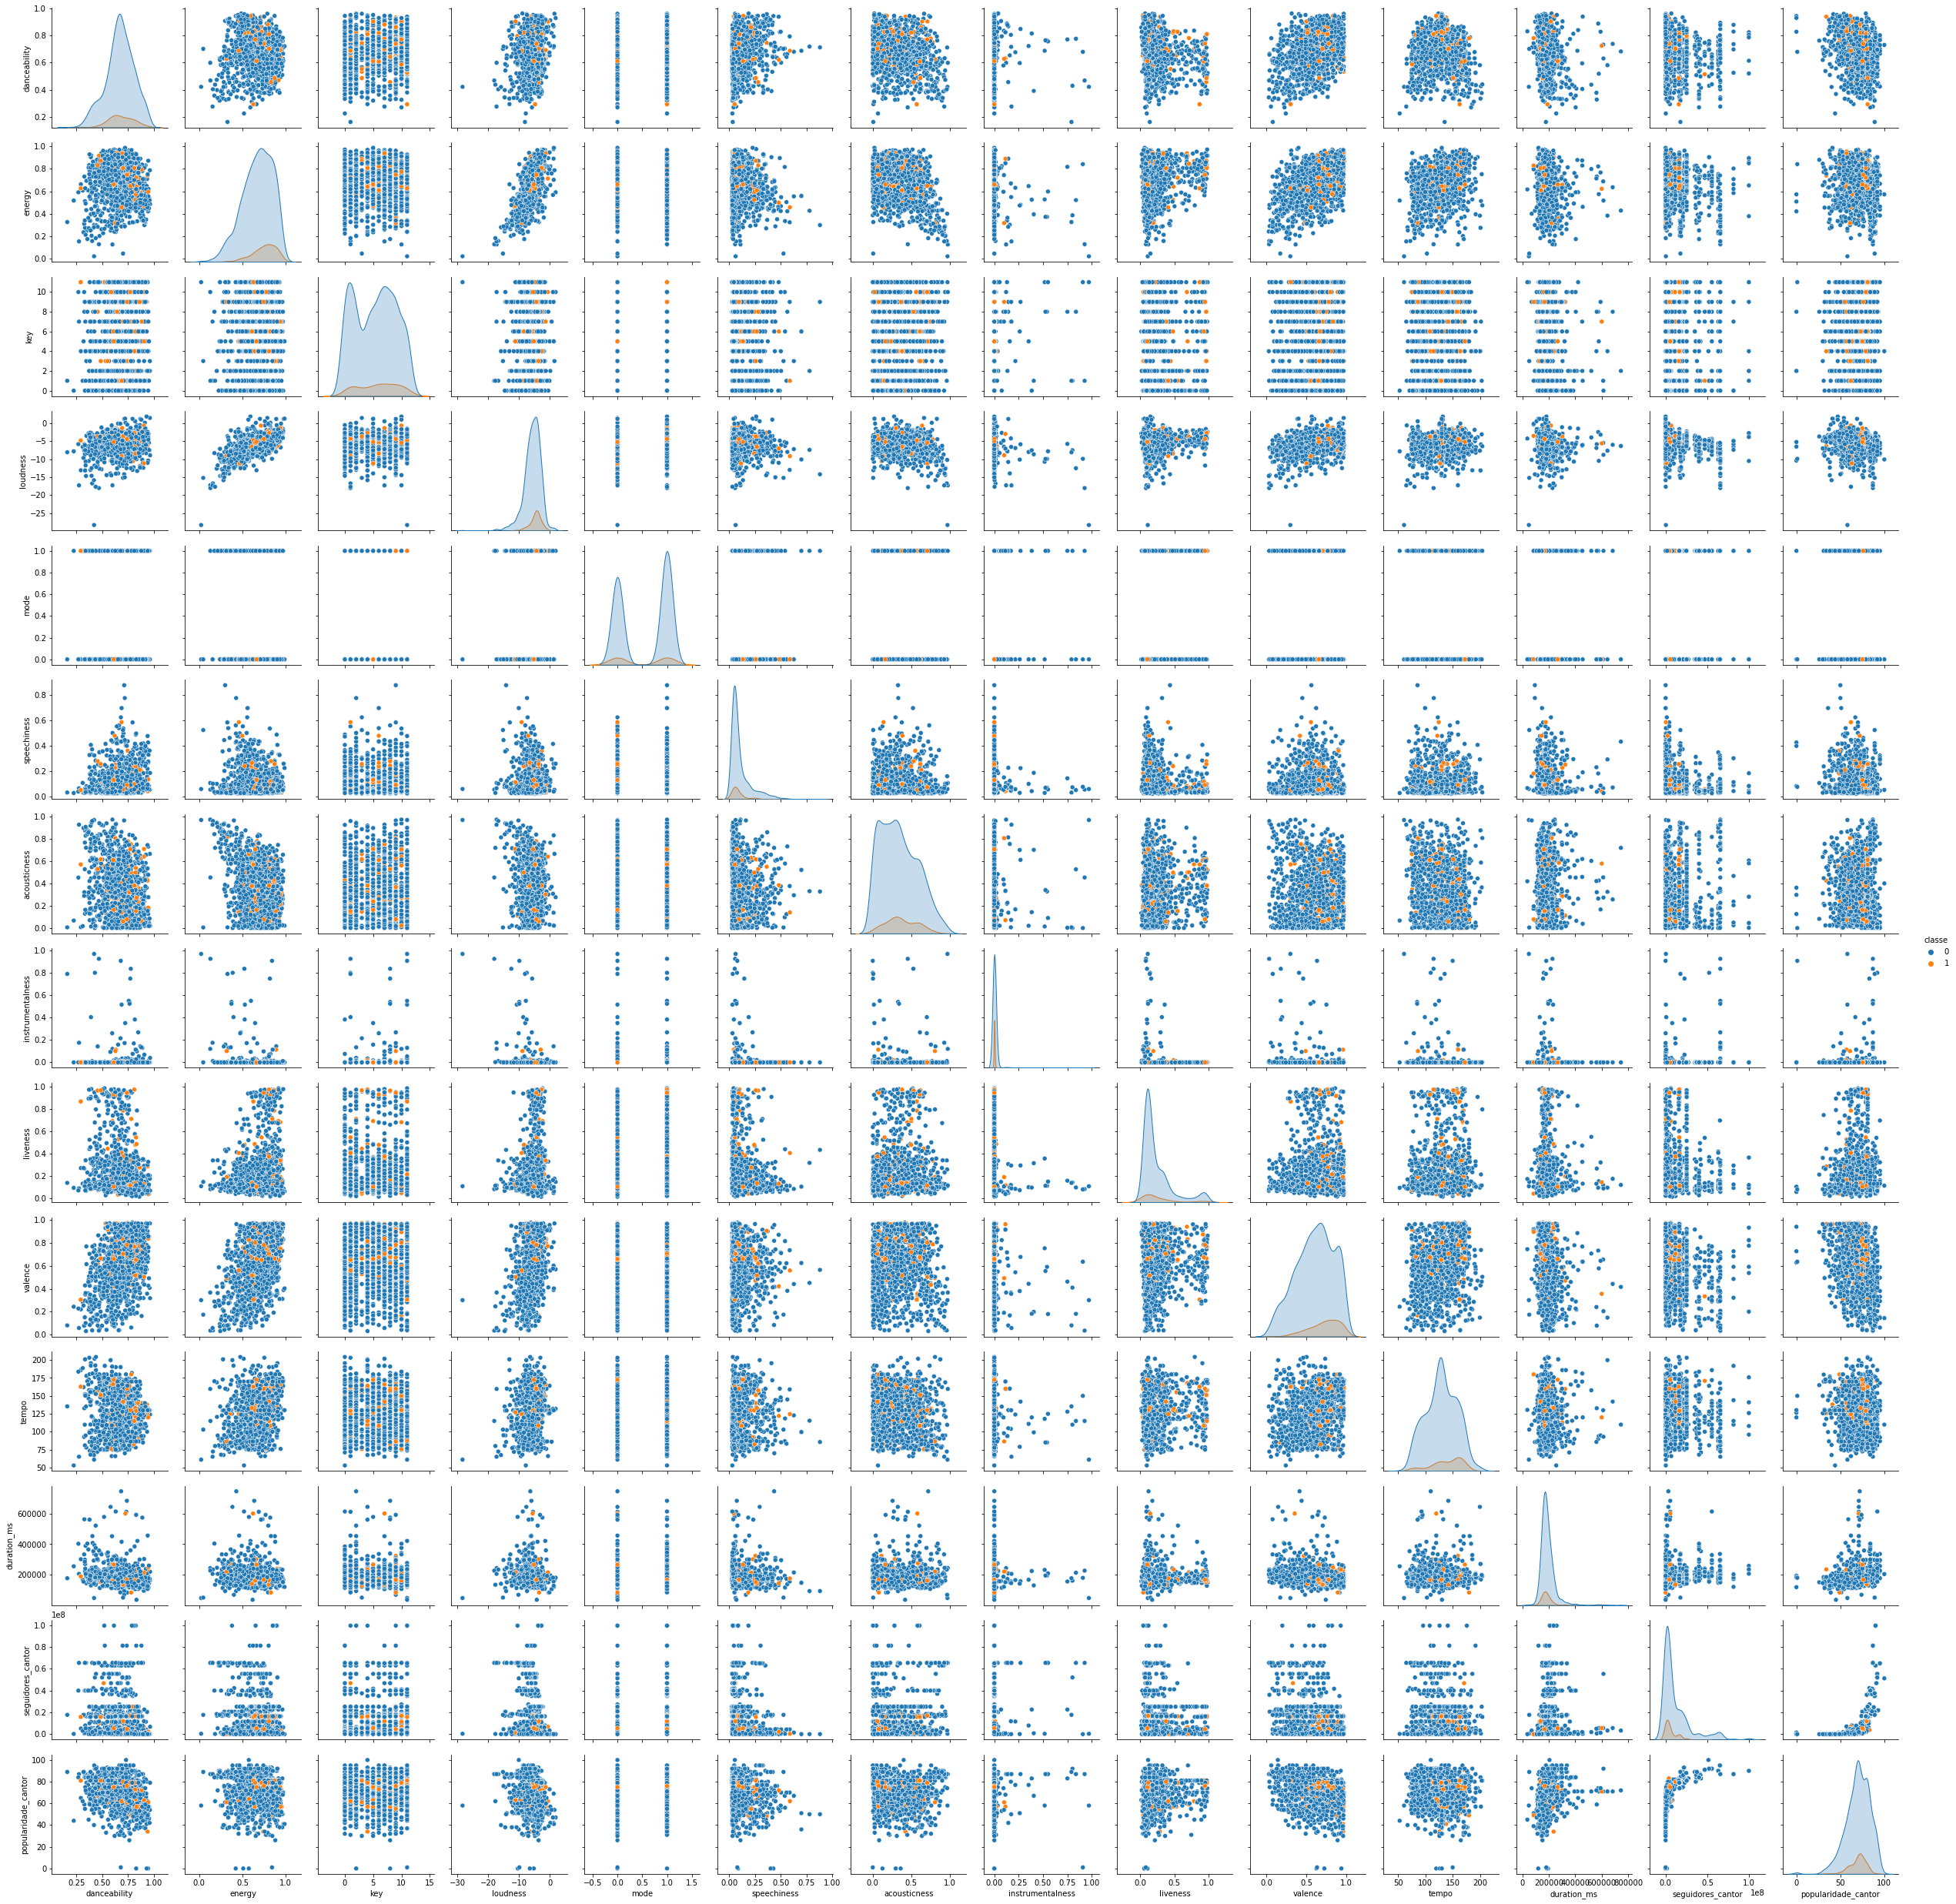

In [96]:
features_comparacoes_1 = ['danceability', 'energy', 'key', 'loudness', 'pop_media_4m', 'classe']
features_comparacoes_2 = ['mode', 'speechiness',  'acousticness', 'instrumentalness', 'liveness', 'pop_media_4m','classe']
features_comparacoes_3 = ['liveness', 'valence', 'tempo', 'duration_ms','pop_media_4m','classe']

features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
            'seguidores_cantor','popularidade_cantor', 'classe']


#sns.pairplot(df_analise[features_comparacoes_1], hue = 'classe' )
sns.pairplot(df_analise[features], hue = 'classe' )
plt.show()

In [29]:
#sns.pairplot(df_analise[features_comparacoes_2], hue = 'classe' )
#plt.show()

In [30]:
#sns.pairplot(df_analise[features_comparacoes_3], hue = 'classe' )
#plt.show()

## 3.6 Estatisticas descritivas de musicas populares e não populares

### 3.6.1 Musicas comuns

In [167]:
df_analise[(df_analise['classe']==0)].describe()

Unnamed: 0  danceability       energy          key     loudness  \
count  1242.000000   1242.000000  1242.000000  1242.000000  1242.000000   
mean    695.550725      0.669458     0.671194     5.302738    -5.726172   
std     395.926268      0.135929     0.174077     3.562742     2.714351   
min       7.000000      0.161000     0.022900     0.000000   -28.325000   
25%     352.500000      0.594000     0.557000     2.000000    -7.106500   
50%     689.500000      0.672000     0.688500     6.000000    -5.416000   
75%    1040.750000      0.760000     0.808750     8.000000    -3.909500   
max    1380.000000      0.964000     0.986000    11.000000     1.906000   

              mode  speechiness  acousticness  instrumentalness     liveness  \
count  1242.000000  1242.000000   1242.000000       1242.000000  1242.000000   
mean      0.564412     0.107821      0.341466          0.010356     0.236844   
std       0.496033     0.107630      0.239332          0.075555     0.227510   
min       0.000000     0.024800      0.000110          0.000000     0.013400   
25%       0.000000     0.042700      0.141250          0.000000     0.096600   
50%       1.000000     0.062700      0.314000          0.000000     0.132000   
75%       1.000000     0.127750      0.521000          0.000006     0.308500   
max       1.000000     0.879000      0.974000          0.971000     0.989000   

           valence        tempo    duration_ms  time_signature  \
count  1242.000000  1242.000000    1242.000000     1242.000000   
mean      0.604040   129.066829  190380.479066        3.983092   
std       0.234875    28.574419   61192.484449        0.290384   
min       0.032000    52.989000   37801.000000        1.000000   
25%       0.438250   109.461500  158480.000000        4.000000   
50%       0.626500   129.946500  178195.000000        4.000000   
75%       0.786250   150.149000  207423.500000        4.000000   
max       0.975000   204.319000  744727.000000        5.000000   

       popularidade_cantor  seguidores_cantor  n_registros  pop_media_4m  \
count          1242.000000       1.242000e+03  1242.000000   1242.000000   
mean             69.888889       1.201181e+07    37.522544      0.048463   
std              13.643931       1.821065e+07    41.805234      0.062734   
min               0.000000       1.150000e+02     1.000000      0.000553   
25%              62.000000       6.705315e+05     3.000000      0.002546   
50%              70.000000       3.491242e+06    16.000000      0.016997   
75%              80.750000       1.670238e+07    69.000000      0.076489   
max             100.000000       9.961204e+07   121.000000      0.256902   

       pop_desvpad_4m  
count     1019.000000  
mean         0.034671  
std          0.032194  
min          0.000019  
25%          0.013668  
50%          0.024442  
75%          0.045131  
max          0.272804

### 3.6.1 Musicas populares

In [168]:
df_analise[(df_analise['classe']==1)].describe()

Unnamed: 0  danceability      energy         key    loudness  \
count   139.000000    139.000000  139.000000  139.000000  139.000000   
mean    640.402878      0.680144    0.750388    5.877698   -4.663719   
std     421.917186      0.122158    0.132940    3.391080    1.822553   
min       0.000000      0.292000    0.318000    0.000000  -11.143000   
25%     313.000000      0.600000    0.669000    3.000000   -5.458000   
50%     710.000000      0.669000    0.773000    6.000000   -4.386000   
75%     983.500000      0.768000    0.860000    9.000000   -3.642000   
max    1377.000000      0.946000    0.953000   11.000000   -0.623000   

             mode  speechiness  acousticness  instrumentalness    liveness  \
count  139.000000   139.000000    139.000000        139.000000  139.000000   
mean     0.503597     0.091966      0.372516          0.001899    0.269736   
std      0.501795     0.083370      0.197720          0.012983    0.269057   
min      0.000000     0.030500      0.001460          0.000000    0.032000   
25%      0.000000     0.044900      0.240500          0.000000    0.092750   
50%      1.000000     0.061200      0.335000          0.000000    0.144000   
75%      1.000000     0.101000      0.553000          0.000003    0.340000   
max      1.000000     0.588000      0.807000          0.114000    0.977000   

          valence       tempo    duration_ms  time_signature  \
count  139.000000  139.000000     139.000000      139.000000   
mean     0.726022  138.613748  183887.956835        4.021583   
std      0.184126   27.731060   49986.539856        0.189110   
min      0.169000   75.188000   85333.000000        3.000000   
25%      0.604500  121.981500  159812.000000        4.000000   
50%      0.766000  147.962000  173913.000000        4.000000   
75%      0.878000  161.420500  196290.500000        4.000000   
max      0.972000  179.973000  600000.000000        5.000000   

       popularidade_cantor  seguidores_cantor  n_registros  pop_media_4m  \
count           139.000000       1.390000e+02   139.000000    139.000000   
mean             69.604317       6.131719e+06   117.043165      0.435334   
std               9.138721       7.556112e+06    11.776832      0.146903   
min              34.000000       1.783700e+04    42.000000      0.257113   
25%              64.000000       6.794920e+05   121.000000      0.313024   
50%              71.000000       3.284069e+06   121.000000      0.397744   
75%              75.000000       8.877936e+06   121.000000      0.534496   
max              91.000000       4.680257e+07   121.000000      0.819723   

       pop_desvpad_4m  
count      139.000000  
mean         0.146192  
std          0.060506  
min          0.033139  
25%          0.099945  
50%          0.136661  
75%          0.185154  
max          0.327077

# 4. Limpeza e Feature Engineering

In [169]:
df_analise.columns

Index(['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'URL', 'popularidade_cantor',
       'seguidores_cantor', 'genero_cantor', 'genero_primario_cantor',
       'data_entrada_charts', 'data_final_4m', 'n_registros', 'pop_media_4m',
       'pop_desvpad_4m', 'classe'],
      dtype='object')

In [170]:
df_final = df_analise.copy()
df_final = df_final[['URL','danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo', 'popularidade_cantor', 'seguidores_cantor','genero_primario_cantor','classe']]

## Tipo de dados

In [171]:
df_final.dtypes

URL                        object
danceability              float64
energy                    float64
key                         int64
loudness                  float64
speechiness               float64
acousticness              float64
instrumentalness          float64
liveness                  float64
valence                   float64
tempo                     float64
popularidade_cantor         int64
seguidores_cantor           int64
genero_primario_cantor     object
classe                     object
dtype: object

In [172]:
df_final['classe'] = df_final['classe'].astype(int)
df_final.dtypes

URL                        object
danceability              float64
energy                    float64
key                         int64
loudness                  float64
speechiness               float64
acousticness              float64
instrumentalness          float64
liveness                  float64
valence                   float64
tempo                     float64
popularidade_cantor         int64
seguidores_cantor           int64
genero_primario_cantor     object
classe                      int32
dtype: object

In [173]:
df_final.nunique()

URL                       1381
danceability               495
energy                     571
key                         12
loudness                  1167
speechiness                708
acousticness               768
instrumentalness           384
liveness                   638
valence                    646
tempo                     1219
popularidade_cantor         68
seguidores_cantor          389
genero_primario_cantor      92
classe                       2
dtype: int64

In [174]:
numeric_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo', 'popularidade_cantor', 'seguidores_cantor']
categorical_features = ['genero_primario_cantor','key']
chave_primaria = ['URL']
target = ['classe']

## 4.1 Variáveis categóricas

In [175]:
df_final.key.unique()

array([10,  5,  9, 11,  6,  3,  1,  7,  4,  0,  2,  8], dtype=int64)

In [176]:
df_final.key.value_counts()

0     152
1     146
7     143
9     138
6     128
2     122
11    121
4     116
8     115
5      95
10     71
3      34
Name: key, dtype: int64

In [177]:
df_final.genero_primario_cantor.unique()

array(['arrocha', nan, 'funk carioca', 'forro', 'sertanejo pop', 'pagode',
       'sertanejo', 'arrochadeira', 'brazilian hip hop',
       'canadian contemporary r&b', 'funk 150 bpm', 'brega funk', 'pop',
       'electro house', 'dance pop', 'melodic rap', 'australian pop',
       'indie soul', 'axe', 'r&b brasileiro', 'funk bh', 'rap baiano',
       'edm', 'brazilian rock', 'cali rap', 'pop nacional', 'mpb',
       'canadian pop', 'k-pop', 'rap', 'belo horizonte indie', 'art pop',
       'folk brasileiro', 'slap house', 'north carolina hip hop',
       'adoracao', 'afrofuturismo brasileiro', 'modern alternative rock',
       'indie curitibano', 'modern rock', 'latin', 'big room', 'alt z',
       'trap baiano', 'brazilian edm', 'trap brasileiro',
       'pop rap brasileiro', 'hip hop', 'bossa nova',
       'australian hip hop', 'funk mtg', 'colombian pop', 'pagode novo',
       'dutch pop', 'canadian hip hop', 'funk mandelao', 'trap funk',
       'nerdcore brasileiro', 'lgbtq+ hip hop'

In [178]:
df_final.genero_primario_cantor.value_counts()

arrocha             486
funk carioca        177
dance pop            66
pop                  48
art pop              43
                   ... 
indie curitibano      1
manguebeat            1
dutch pop             1
funk capixaba         1
brazilian gospel      1
Name: genero_primario_cantor, Length: 92, dtype: int64

## 4.2 Variáveis numéricas

## 4.3 Dados duplicados

In [179]:
df_final.duplicated().sum()

0

Não há dados duplicados na base

## 4.4 Dados Faltantes

In [180]:
df_final.isnull().sum()

URL                        0
danceability               0
energy                     0
key                        0
loudness                   0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
popularidade_cantor        0
seguidores_cantor          0
genero_primario_cantor    49
classe                     0
dtype: int64

49 registros sem nenhum genero atribuido ao cantor, pode ter ocorrido um problema na captura de dados do spotify

In [181]:
df_final = df_final.dropna()
df_final.isnull().sum()

URL                       0
danceability              0
energy                    0
key                       0
loudness                  0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
popularidade_cantor       0
seguidores_cantor         0
genero_primario_cantor    0
classe                    0
dtype: int64

In [182]:
df_final

URL  danceability  energy  \
0     https://open.spotify.com/track/2JTir3y1VuJQmex...         0.582   0.937   
1     https://open.spotify.com/track/3rRin3LyLY92kpE...         0.599   0.914   
3     https://open.spotify.com/track/6sPBi0qLI6KM3yX...         0.709   0.816   
4     https://open.spotify.com/track/15k1TDabqSEmyXO...         0.632   0.953   
5     https://open.spotify.com/track/3dPvQLKl42dMYWV...         0.775   0.886   
...                                                 ...           ...     ...   
1376  https://open.spotify.com/track/7MJiZazhXeWZoFZ...         0.829   0.619   
1377  https://open.spotify.com/track/2AQJRDfQJbfgmTf...         0.612   0.661   
1378  https://open.spotify.com/track/67MzL6NnggPqvBf...         0.810   0.700   
1379  https://open.spotify.com/track/7uHVSsfgVm7FpG7...         0.941   0.751   
1380  https://open.spotify.com/track/1TFqH3zKOiTZoVe...         0.405   0.829   

      key  loudness  speechiness  acousticness  instrumentalness  liveness  \
0      10    -2.118       0.0858        0.4490          0.000000    0.6840   
1       5    -2.415       0.0629        0.5000          0.000000    0.6940   
3      11    -4.787       0.0346        0.6850          0.000000    0.1460   
4       9    -1.283       0.0325        0.3170          0.000000    0.1250   
5       6    -6.680       0.0476        0.5890          0.000008    0.0991   
...   ...       ...          ...           ...               ...       ...   
1376    1    -0.861       0.2040        0.1860          0.028300    0.1180   
1377    5    -5.175       0.1330        0.1630          0.000000    0.1030   
1378    7    -7.154       0.0579        0.0669          0.000001    0.0749   
1379    2    -2.799       0.0973        0.1540          0.000026    0.0677   
1380    2    -6.057       0.0582        0.6200          0.000046    0.3270   

      valence    tempo  popularidade_cantor  seguidores_cantor  \
0       0.939  168.096                   70            6220557   
1       0.831  168.008                   70            6220557   
3       0.921  150.060                   70            2665488   
4       0.798  160.061                   57            1629840   
5       0.939  172.013                   70            6220557   
...       ...      ...                  ...                ...   
1376    0.908   86.494                   51               6640   
1377    0.659  172.467                   75            5429554   
1378    0.935  159.967                   66              89158   
1379    0.965  130.047                   49              91351   
1380    0.767  181.222                   71            1894024   

     genero_primario_cantor  classe  
0                   arrocha       1  
1                   arrocha       1  
3                   arrocha       1  
4                   arrocha       1  
5                   arrocha       1  
...                     ...     ...  
1376               funk mtg       0  
1377         r&b brasileiro       1  
1378              rave funk       0  
1379                arrocha       0  
1380                 pagode       0  

[1332 rows x 15 columns]

## Performance musicas populares vs comuns

In [183]:
df_plot = df.copy()
df_plot = df_plot.merge(df_final, how='left', on='URL')
df_plot.dropna(inplace=True)
print(len(df_plot.URL.unique())), print(len(df_final.URL.unique()))
#df_plot

1332
1332


(None, None)

In [184]:
## Normalizando numero de streams com standardScaler
df_plot3 = df_plot.copy()
scaler = StandardScaler()
scaler.fit(df_plot3['stream_diaria'].to_numpy().reshape(-1, 1))
X = scaler.transform(df_plot3['stream_diaria'].to_numpy().reshape(-1, 1))

df_plot3['stream_diaria'] = X
df_plot3.set_index(keys = 'data', inplace=True)
#df_plot3

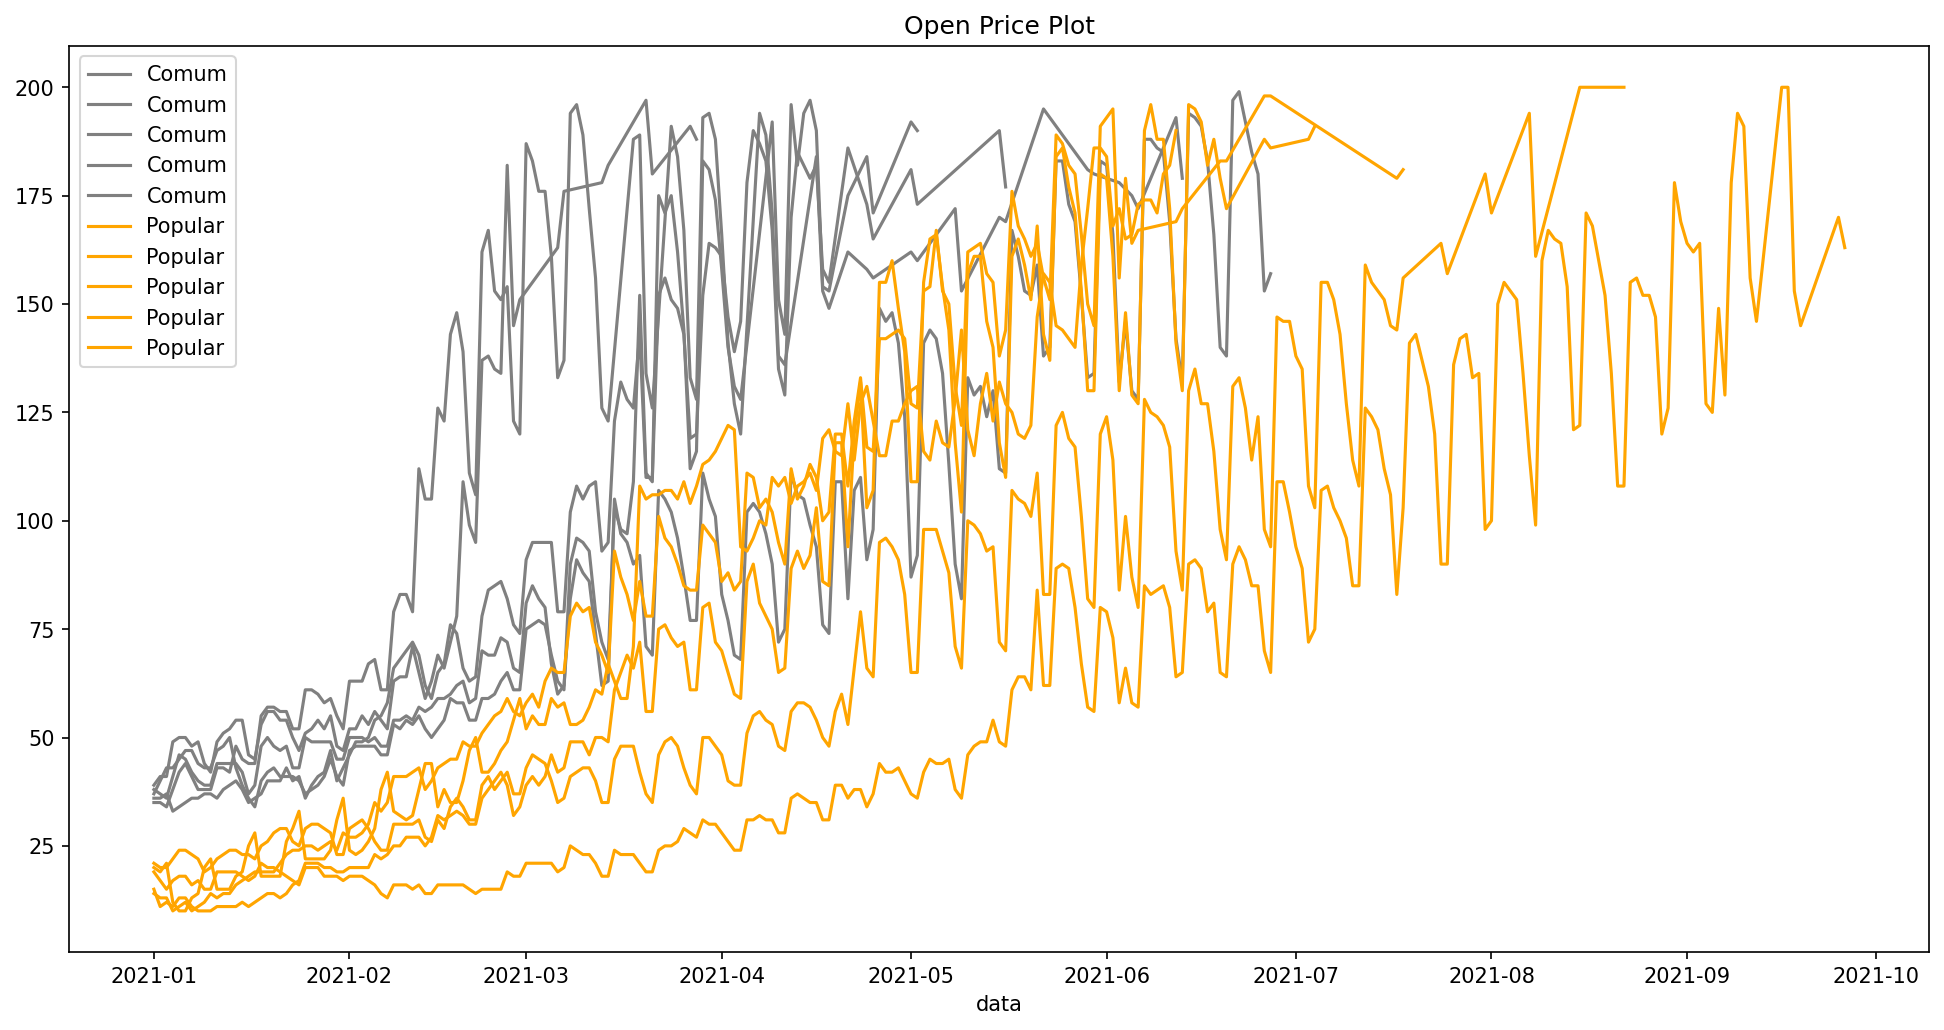

In [185]:
import random

#num_aleatorio = random.randint(1,125)
num_aleatorio=11

num_lines_each_class = 5

# code
# Visualizing The Open Price of all the stocks

# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.

for key, grp in df_plot3.groupby(['classe']): 
    
    if key == 1:
        label = "Popular"
        color = 'orange'

        
    else:
        label = "Comum"
        color = 'gray'

        
    for i, URL in enumerate(df_final[(df_final['classe']==key)].URL.unique()):
        
        if i in range(num_aleatorio,num_lines_each_class+num_aleatorio):
            grp_filtrado_URL = grp[(grp['URL']==URL)]        
            grp_filtrado_URL['Position'].plot(label=label, color=color)
        

  
###adding title to the plot
plt.title('Open Price Plot')
  
# adding Label to the x-axis
plt.xlabel('data')
  
# adding legend to the curve
plt.legend()

# 5 Amostragem de 20% dos dados para validação, 20% teste, 60% treino

In [186]:
from sklearn.model_selection import train_test_split

X = df_final.drop(["URL","classe"],axis=1)
y = df_final["classe"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.20,random_state = 0, stratify = y)

## teste é 25% do conjunto de treino e corresponde á 20% da base total de dados
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,test_size=0.25,random_state = 0, stratify = y_train)

y_valid.value_counts()

0    240
1     27
Name: classe, dtype: int64

In [187]:
y_train.value_counts()

0    718
1     80
Name: classe, dtype: int64

In [188]:
y_test.value_counts()

0    240
1     27
Name: classe, dtype: int64

# 6 Pré-Processamento

## 6.1 LabelEncoding

In [189]:
features_encoder = ['genero_primario_cantor']

In [190]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

X_train_labelencoder = X_train.copy()

for feature in features_encoder:
    
    X = enc.fit_transform(X_train[feature])
    
    #Atualizando o dataframe
    X_train_labelencoder[feature] = X
    
X_train_labelencoder.head()

danceability  energy  key  loudness  speechiness  acousticness  \
19           0.867   0.670    0    -3.839       0.0438         0.230   
763          0.727   0.638   11    -8.687       0.0670         0.484   
1080         0.578   0.669    4    -4.748       0.0341         0.279   
191          0.648   0.872    3    -3.062       0.0384         0.349   
790          0.650   0.792    6    -3.825       0.0393         0.607   

      instrumentalness  liveness  valence    tempo  popularidade_cantor  \
19            0.004680    0.0889    0.891  135.064                   72   
763           0.035100    0.0815    0.913  152.059                   75   
1080          0.000000    0.1710    0.530  110.001                   74   
191           0.000001    0.1420    0.933  155.970                   70   
790           0.000024    0.9200    0.872  154.027                   69   

      seguidores_cantor  genero_primario_cantor  
19              5004855                      38  
763             3491242                       5  
1080           16702383                       5  
191             3966357                       5  
790              438089                       5

In [191]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

X_valid_labelencoder = X_valid.copy()

for feature in features_encoder:
    
    X = enc.fit_transform(X_valid[feature])
    
    #Atualizando o dataframe
    X_valid_labelencoder[feature] = X
    
X_valid_labelencoder.head()

danceability  energy  key  loudness  speechiness  acousticness  \
773         0.719   0.793    0    -4.402       0.0421         0.352   
53          0.749   0.740    7    -4.786       0.0273         0.505   
710         0.631   0.861   11    -1.891       0.0424         0.427   
740         0.825   0.728    6    -5.049       0.0938         0.446   
827         0.680   0.578    9    -6.410       0.1690         0.470   

     instrumentalness  liveness  valence    tempo  popularidade_cantor  \
773          0.000000    0.5570    0.766  120.108                   70   
53           0.000091    0.0989    0.611  122.040                   53   
710          0.000119    0.2150    0.822  149.950                   75   
740          0.000003    0.1260    0.690  145.123                   45   
827          0.000000    0.2180    0.403   90.022                   74   

     seguidores_cantor  genero_primario_cantor  
773            4538394                      42  
53              184886                      21  
710             524751                       3  
740             120230                      25  
827            3284069                      25

In [192]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

X_test_labelencoder = X_test.copy()

for feature in features_encoder:
    
    X = enc.fit_transform(X_test[feature])
    
    #Atualizando o dataframe
    X_test_labelencoder[feature] = X
    
X_test_labelencoder.head()

danceability  energy  key  loudness  speechiness  acousticness  \
94           0.793   0.793   11    -4.521       0.0830        0.0123   
766          0.681   0.847    1    -5.453       0.0331        0.7170   
669          0.804   0.538    4    -8.463       0.2780        0.2270   
1237         0.774   0.732    9    -4.227       0.0308        0.1080   
471          0.688   0.898    8    -3.939       0.0471        0.0142   

      instrumentalness  liveness  valence    tempo  popularidade_cantor  \
94                 0.0    0.0951    0.679  123.950                   89   
766                0.0    0.3270    0.945  150.001                   75   
669                0.0    0.2510    0.424  125.131                   70   
1237               0.0    0.2430    0.734  135.005                   79   
471                0.0    0.1840    0.784   92.036                   77   

      seguidores_cantor  genero_primario_cantor  
94             34967092                      19  
766             3491242                       4  
669             4326456                      24  
1237           16376285                       4  
471            11583399                      21

# 6.2 OneHot Encoding

In [193]:
from category_encoders.one_hot import OneHotEncoder

enc = OneHotEncoder(cols=features_encoder, use_cat_names=True)
enc.fit(X_train)

OneHotEncoder(cols=['genero_primario_cantor'], use_cat_names=True)

In [194]:
X_train_ohe = enc.transform(X_train)
X_train_ohe

danceability  energy  key  loudness  speechiness  acousticness  \
19           0.867   0.670    0    -3.839       0.0438        0.2300   
763          0.727   0.638   11    -8.687       0.0670        0.4840   
1080         0.578   0.669    4    -4.748       0.0341        0.2790   
191          0.648   0.872    3    -3.062       0.0384        0.3490   
790          0.650   0.792    6    -3.825       0.0393        0.6070   
...            ...     ...  ...       ...          ...           ...   
1242         0.584   0.557    6    -6.371       0.0342        0.0129   
987          0.620   0.943    5    -2.171       0.0435        0.3630   
1070         0.684   0.563    6    -6.486       0.0794        0.5340   
953          0.752   0.690    7    -3.948       0.0642        0.2700   
35           0.921   0.830    5    -1.361       0.1350        0.5840   

      instrumentalness  liveness  valence    tempo  ...  \
19            0.004680    0.0889    0.891  135.064  ...   
763           0.035100    0.0815    0.913  152.059  ...   
1080          0.000000    0.1710    0.530  110.001  ...   
191           0.000001    0.1420    0.933  155.970  ...   
790           0.000024    0.9200    0.872  154.027  ...   
...                ...       ...      ...      ...  ...   
1242          0.000000    0.0576    0.767  154.008  ...   
987           0.000000    0.0705    0.968  167.945  ...   
1070          0.000000    0.1040    0.672  135.969  ...   
953           0.000000    0.3030    0.396  148.070  ...   
35            0.000032    0.0522    0.596  133.089  ...   

      genero_primario_cantor_permanent wave  \
19                                        0   
763                                       0   
1080                                      0   
191                                       0   
790                                       0   
...                                     ...   
1242                                      0   
987                                       0   
1070                                      0   
953                                       0   
35                                        0   

      genero_primario_cantor_rap baiano  genero_primario_cantor_dfw rap  \
19                                    0                               0   
763                                   0                               0   
1080                                  0                               0   
191                                   0                               0   
790                                   0                               0   
...                                 ...                             ...   
1242                                  0                               0   
987                                   0                               0   
1070                                  0                               0   
953                                   0                               0   
35                                    0                               0   

      genero_primario_cantor_irish singer-songwriter  \
19                                                 0   
763                                                0   
1080                                               0   
191                                                0   
790                                                0   
...                                              ...   
1242                                               0   
987                                                0   
1070                                               0   
953                                                0   
35                                                 0   

      genero_primario_cantor_latin arena pop  \
19                                         0   
763                                        0   
1080                                       0   
191                                        0   
790                                        0   
...  

In [195]:
X_valid_ohe = enc.transform(X_valid)
X_valid_ohe

danceability  energy  key  loudness  speechiness  acousticness  \
773          0.719   0.793    0    -4.402       0.0421        0.3520   
53           0.749   0.740    7    -4.786       0.0273        0.5050   
710          0.631   0.861   11    -1.891       0.0424        0.4270   
740          0.825   0.728    6    -5.049       0.0938        0.4460   
827          0.680   0.578    9    -6.410       0.1690        0.4700   
...            ...     ...  ...       ...          ...           ...   
1007         0.841   0.527    6    -8.116       0.1490        0.0427   
731          0.760   0.585    4    -6.967       0.0476        0.4320   
1220         0.752   0.911   10    -3.896       0.0571        0.2230   
70           0.953   0.544    5    -5.411       0.0843        0.0466   
120          0.783   0.902    6    -3.063       0.0351        0.3820   

      instrumentalness  liveness  valence    tempo  ...  \
773           0.000000    0.5570    0.766  120.108  ...   
53            0.000091    0.0989    0.611  122.040  ...   
710           0.000119    0.2150    0.822  149.950  ...   
740           0.000003    0.1260    0.690  145.123  ...   
827           0.000000    0.2180    0.403   90.022  ...   
...                ...       ...      ...      ...  ...   
1007          0.000002    0.1200    0.582  163.975  ...   
731           0.000000    0.0785    0.875  155.933  ...   
1220          0.000000    0.5160    0.818  101.872  ...   
70            0.017900    0.0395    0.853  129.988  ...   
120           0.000000    0.0556    0.897  144.116  ...   

      genero_primario_cantor_permanent wave  \
773                                       0   
53                                        0   
710                                       0   
740                                       0   
827                                       0   
...                                     ...   
1007                                      0   
731                                       0   
1220                                      0   
70                                        0   
120                                       0   

      genero_primario_cantor_rap baiano  genero_primario_cantor_dfw rap  \
773                                   0                               0   
53                                    0                               0   
710                                   0                               0   
740                                   0                               0   
827                                   0                               0   
...                                 ...                             ...   
1007                                  0                               0   
731                                   0                               0   
1220                                  0                               0   
70                                    0                               0   
120                                   0                               0   

      genero_primario_cantor_irish singer-songwriter  \
773                                                0   
53                                                 0   
710                                                0   
740                                                0   
827                                                0   
...                                              ...   
1007                                               0   
731                                                0   
1220                                               0   
70                                                 0   
120                                                0   

      genero_primario_cantor_latin arena pop  \
773                                        0   
53                                         0   
710                                        0   
740                                        0   
827                                        0   
...  

In [196]:
X_test_ohe = enc.transform(X_test)
X_test_ohe

danceability  energy  key  loudness  speechiness  acousticness  \
94           0.793   0.793   11    -4.521       0.0830        0.0123   
766          0.681   0.847    1    -5.453       0.0331        0.7170   
669          0.804   0.538    4    -8.463       0.2780        0.2270   
1237         0.774   0.732    9    -4.227       0.0308        0.1080   
471          0.688   0.898    8    -3.939       0.0471        0.0142   
...            ...     ...  ...       ...          ...           ...   
1307         0.523   0.891    6    -4.229       0.1660        0.2610   
367          0.867   0.374    9   -11.883       0.2360        0.6290   
1314         0.433   0.684    4    -6.623       0.1830        0.0199   
247          0.600   0.528    6    -7.713       0.4340        0.0232   
1029         0.953   0.449    1    -7.409       0.0610        0.0184   

      instrumentalness  liveness  valence    tempo  ...  \
94            0.000000    0.0951   0.6790  123.950  ...   
766           0.000000    0.3270   0.9450  150.001  ...   
669           0.000000    0.2510   0.4240  125.131  ...   
1237          0.000000    0.2430   0.7340  135.005  ...   
471           0.000000    0.1840   0.7840   92.036  ...   
...                ...       ...      ...      ...  ...   
1307          0.000000    0.3310   0.5390  191.996  ...   
367           0.000000    0.1610   0.6840  130.026  ...   
1314          0.000010    0.1040   0.4030  192.509  ...   
247           0.000962    0.0998   0.0847  120.115  ...   
1029          0.000000    0.1230   0.4910  130.040  ...   

      genero_primario_cantor_permanent wave  \
94                                        0   
766                                       0   
669                                       0   
1237                                      0   
471                                       0   
...                                     ...   
1307                                      0   
367                                       0   
1314                                      0   
247                                       0   
1029                                      0   

      genero_primario_cantor_rap baiano  genero_primario_cantor_dfw rap  \
94                                    0                               0   
766                                   0                               0   
669                                   0                               0   
1237                                  0                               0   
471                                   0                               0   
...                                 ...                             ...   
1307                                  0                               0   
367                                   0                               0   
1314                                  0                               0   
247                                   0                               0   
1029                                  0                               0   

      genero_primario_cantor_irish singer-songwriter  \
94                                                 0   
766                                                0   
669                                                0   
1237                                               0   
471                                                0   
...                                              ...   
1307                                               0   
367                                                0   
1314                                               0   
247                                                0   
1029                                               0   

      genero_primario_cantor_latin arena pop  \
94                                         0   
766                                        0   
669                                        0   
1237                                       0   
471                                        0   
...  

# Target Encoding

In [197]:
from category_encoders.target_encoder import TargetEncoder
enc = TargetEncoder(cols=features_encoder,
                   min_samples_leaf=200)
enc.fit(X_train, y_train)
X_train_targetencoding = enc.transform(X_train)
X_train_targetencoding   

danceability  energy  key  loudness  speechiness  acousticness  \
19           0.867   0.670    0    -3.839       0.0438        0.2300   
763          0.727   0.638   11    -8.687       0.0670        0.4840   
1080         0.578   0.669    4    -4.748       0.0341        0.2790   
191          0.648   0.872    3    -3.062       0.0384        0.3490   
790          0.650   0.792    6    -3.825       0.0393        0.6070   
...            ...     ...  ...       ...          ...           ...   
1242         0.584   0.557    6    -6.371       0.0342        0.0129   
987          0.620   0.943    5    -2.171       0.0435        0.3630   
1070         0.684   0.563    6    -6.486       0.0794        0.5340   
953          0.752   0.690    7    -3.948       0.0642        0.2700   
35           0.921   0.830    5    -1.361       0.1350        0.5840   

      instrumentalness  liveness  valence    tempo  popularidade_cantor  \
19            0.004680    0.0889    0.891  135.064                   72   
763           0.035100    0.0815    0.913  152.059                   75   
1080          0.000000    0.1710    0.530  110.001                   74   
191           0.000001    0.1420    0.933  155.970                   70   
790           0.000024    0.9200    0.872  154.027                   69   
...                ...       ...      ...      ...                  ...   
1242          0.000000    0.0576    0.767  154.008                   92   
987           0.000000    0.0705    0.968  167.945                   70   
1070          0.000000    0.1040    0.672  135.969                   63   
953           0.000000    0.3030    0.396  148.070                   89   
35            0.000032    0.0522    0.596  133.089                   53   

      seguidores_cantor  genero_primario_cantor  
19              5004855                0.100251  
763             3491242                0.184818  
1080           16702383                0.184818  
191             3966357                0.184818  
790              438089                0.184818  
...                 ...                     ...  
1242           55342492                0.100251  
987             6220557                0.184818  
1070            1068074                0.100251  
953            17698450                0.100251  
35                79052                0.100251  

[798 rows x 13 columns]

In [198]:
X_valid_targetencoding = enc.transform(X_valid)
X_valid_targetencoding   

danceability  energy  key  loudness  speechiness  acousticness  \
773          0.719   0.793    0    -4.402       0.0421        0.3520   
53           0.749   0.740    7    -4.786       0.0273        0.5050   
710          0.631   0.861   11    -1.891       0.0424        0.4270   
740          0.825   0.728    6    -5.049       0.0938        0.4460   
827          0.680   0.578    9    -6.410       0.1690        0.4700   
...            ...     ...  ...       ...          ...           ...   
1007         0.841   0.527    6    -8.116       0.1490        0.0427   
731          0.760   0.585    4    -6.967       0.0476        0.4320   
1220         0.752   0.911   10    -3.896       0.0571        0.2230   
70           0.953   0.544    5    -5.411       0.0843        0.0466   
120          0.783   0.902    6    -3.063       0.0351        0.3820   

      instrumentalness  liveness  valence    tempo  popularidade_cantor  \
773           0.000000    0.5570    0.766  120.108                   70   
53            0.000091    0.0989    0.611  122.040                   53   
710           0.000119    0.2150    0.822  149.950                   75   
740           0.000003    0.1260    0.690  145.123                   45   
827           0.000000    0.2180    0.403   90.022                   74   
...                ...       ...      ...      ...                  ...   
1007          0.000002    0.1200    0.582  163.975                   82   
731           0.000000    0.0785    0.875  155.933                   58   
1220          0.000000    0.5160    0.818  101.872                   81   
70            0.017900    0.0395    0.853  129.988                   57   
120           0.000000    0.0556    0.897  144.116                   44   

      seguidores_cantor  genero_primario_cantor  
773             4538394                0.100251  
53               184886                0.100251  
710              524751                0.184818  
740              120230                0.100251  
827             3284069                0.100251  
...                 ...                     ...  
1007           11385121                0.100251  
731              635797                0.100251  
1220           25185253                0.184818  
70               432676                0.100251  
120               20254                0.100251  

[267 rows x 13 columns]

In [199]:
X_test_targetencoding = enc.transform(X_test)
X_test_targetencoding 

danceability  energy  key  loudness  speechiness  acousticness  \
94           0.793   0.793   11    -4.521       0.0830        0.0123   
766          0.681   0.847    1    -5.453       0.0331        0.7170   
669          0.804   0.538    4    -8.463       0.2780        0.2270   
1237         0.774   0.732    9    -4.227       0.0308        0.1080   
471          0.688   0.898    8    -3.939       0.0471        0.0142   
...            ...     ...  ...       ...          ...           ...   
1307         0.523   0.891    6    -4.229       0.1660        0.2610   
367          0.867   0.374    9   -11.883       0.2360        0.6290   
1314         0.433   0.684    4    -6.623       0.1830        0.0199   
247          0.600   0.528    6    -7.713       0.4340        0.0232   
1029         0.953   0.449    1    -7.409       0.0610        0.0184   

      instrumentalness  liveness  valence    tempo  popularidade_cantor  \
94            0.000000    0.0951   0.6790  123.950                   89   
766           0.000000    0.3270   0.9450  150.001                   75   
669           0.000000    0.2510   0.4240  125.131                   70   
1237          0.000000    0.2430   0.7340  135.005                   79   
471           0.000000    0.1840   0.7840   92.036                   77   
...                ...       ...      ...      ...                  ...   
1307          0.000000    0.3310   0.5390  191.996                   57   
367           0.000000    0.1610   0.6840  130.026                   51   
1314          0.000010    0.1040   0.4030  192.509                   74   
247           0.000962    0.0998   0.0847  120.115                   63   
1029          0.000000    0.1230   0.4910  130.040                   46   

      seguidores_cantor  genero_primario_cantor  
94             34967092                0.100251  
766             3491242                0.184818  
669             4326456                0.100251  
1237           16376285                0.184818  
471            11583399                0.100251  
...                 ...                     ...  
1307            1015619                0.100251  
367              111577                0.100251  
1314            3284069                0.100251  
247              642031                0.100251  
1029               5165                0.100251  

[267 rows x 13 columns]

# 7 Prototipação - Balanceamento de classes e seleção de modelos

In [200]:
Exemplos_minoritario = y_train.value_counts()[1]/(y_train.value_counts().sum())*100
Exemplos_majoritario = y_train.value_counts()[0]/(y_train.value_counts().sum())*100

fator_balanceamento_inicial = Exemplos_minoritario / (100 - Exemplos_minoritario)
fator_balanceamento_inicial

0.11142061281337047

In [201]:
fator_balanceamento_inicial= 0.12

#### Definindo dicionário com os dados de diferentes tipos de encoding

In [205]:
dicionario_teste = {'labelencode': [X_train_labelencoder, X_valid_labelencoder, X_test_labelencoder], 'ohe': [X_train_ohe, X_valid_ohe, X_test_ohe], 'target': [X_train_targetencoding, X_valid_targetencoding, X_test_targetencoding] }

In [206]:
#Balanceamento de dados
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler
    
df_models = pd.DataFrame()

fator_balanceamento = np.linspace(fator_balanceamento_inicial,0.99,20).tolist()
#fator_balanceamento = np.linspace(0.38,0.65,20).tolist()

#Loop numero de repetições do experimento
for i in range(1):
    
    #loop fator de Balanceamento
    for fator in fator_balanceamento:
        
        #Acompanhamento do andamento dos experimentos
        print(i+1,fator)
        
        #loop tipo de encoding
        for encode in dicionario_teste.keys():
            
            
            #Definindo os dados de acordo com o encoding
            X_train2 = dicionario_teste[encode][0]
            y_train2 = y_train
            
            X_valid2 = dicionario_teste[encode][1]


            ###################################################### UNDERSAMPLING ###############################################
            
            #Aplicando balanceamento    
            nr = NearMiss(sampling_strategy = fator)
            X_train3, y_train3 = nr.fit_resample(X_train2, y_train2)

            #Definindo dados de treino (aprendendo com 100% da amostra de treino)
            X_train4 = X_train3
            y_train4 = y_train3 
            
            # Normalizando
            scaler = StandardScaler()
            scaler.fit(X_train4)

            X_train_norm = scaler.transform(X_train4)
            X_valid_norm = scaler.transform(X_valid2)
            
            #Treinando e avaliando dados nao normalizados
            clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models,predictions = clf.fit(X_train4, X_valid2, y_train4, y_valid)
            models['fator'] = fator
            models['metodo'] = 'UnderSampling'
            models['encode'] = encode
            models['Normalizacao'] = "NAO"
            df_models = df_models.append(models.reset_index(), ignore_index=True)

            #Treinando e avaliando dados normalizados
            clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models,predictions = clf.fit(X_train_norm, X_valid_norm, y_train4, y_valid)
            models['fator'] = fator
            models['metodo'] = 'UnderSampling'
            models['encode'] = encode
            models['Normalizacao'] = "SIM"
            df_models = df_models.append(models.reset_index(), ignore_index=True)


            ###################################################### UPSAMPLING ###############################################

          
            #Aplicando balanceamento    
            smt = SMOTE(sampling_strategy = fator)
            X_train3, y_train3 = smt.fit_resample(X_train2, y_train2)

            #Definindo dados de treino (aprendendo com 80% da amostra de treino)
            X_train4, X_descarte, y_train4, y_descarte = train_test_split(X_train3, y_train3,test_size=0.2,random_state = i, stratify = y_train3)

            # Normalizando
            scaler = StandardScaler()
            scaler.fit(X_train4)

            X_train_norm = scaler.transform(X_train4)
            X_valid_norm = scaler.transform(X_valid2)
            
            
            #Treinando e avaliando dados nao normalizados
            clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models,predictions = clf.fit(X_train4, X_valid2, y_train4, y_valid)
            models['fator'] = fator
            models['metodo'] = 'UpSampling'
            models['encode'] = encode
            models['Normalizacao'] = "NAO"
            df_models = df_models.append(models.reset_index(), ignore_index=True)

            #Treinando e avaliando dados normalizados
            clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models,predictions = clf.fit(X_train_norm, X_valid_norm, y_train4, y_valid)
            models['fator'] = fator
            models['metodo'] = 'UpSampling'
            models['encode'] = encode
            models['Normalizacao'] = "SIM"
            df_models = df_models.append(models.reset_index(), ignore_index=True)

1 0.12


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.59it/s]


1 0.16578947368421051


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.58it/s]


1 0.21157894736842103


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.42it/s]


1 0.2573684210526316


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.57it/s]


1 0.30315789473684207


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.66it/s]


1 0.3489473684210526


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.84it/s]


1 0.39473684210526316


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.32it/s]


1 0.44052631578947365


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.10it/s]


1 0.4863157894736842


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.13it/s]


1 0.5321052631578947


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.66it/s]


1 0.5778947368421052


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.53it/s]


1 0.6236842105263157


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.34it/s]


1 0.6694736842105263


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.09it/s]


1 0.7152631578947368


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.31it/s]


1 0.7610526315789473


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.78it/s]


1 0.8068421052631579


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.05it/s]


1 0.8526315789473684


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.61it/s]


1 0.8984210526315789


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.41it/s]


1 0.9442105263157895


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.02it/s]


1 0.99


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.68it/s]


In [207]:
pd.set_option('display.precision',5)

In [208]:
pd.reset_option('^display.',silent=True)

In [209]:
df_models.groupby(['Model','fator','metodo','encode','Normalizacao']).agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False).head(50)

Accuracy  \
Model                         fator    metodo        encode      Normalizacao             
GaussianNB                    0.211579 UnderSampling target      NAO           0.606742   
                                                                 SIM           0.606742   
SGDClassifier                 0.532105 UpSampling    target      SIM           0.719101   
                                                                 NAO           0.719101   
Perceptron                    0.761053 UpSampling    labelencode NAO           0.689139   
                                                                 SIM           0.689139   
SGDClassifier                 0.806842 UpSampling    target      SIM           0.655431   
                                                                 NAO           0.655431   
LGBMClassifier                0.348947 UnderSampling target      NAO           0.767790   
                                                                 SIM           0.767790   
LogisticRegression            0.898421 UpSampling    target      SIM           0.707865   
                                                                 NAO           0.707865   
GaussianNB                    0.165789 UnderSampling labelencode SIM           0.588015   
                                                                 NAO           0.588015   
                              0.120000 UnderSampling labelencode SIM           0.584270   
                                                                 NAO           0.584270   
                              0.211579 UnderSampling labelencode SIM           0.554307   
                                                                 NAO           0.554307   
BernoulliNB                   0.486316 UpSampling    target      SIM           0.760300   
                                                                 NAO           0.760300   
AdaBoostClassifier            0.852632 UpSampling    target      NAO           0.786517   
                                                                 SIM           0.786517   
KNeighborsClassifier          0.623684 UpSampling    target      NAO           0.726592   
                                                                 SIM           0.726592   
LinearSVC                     0.898421 UpSampling    target      NAO           0.696629   
CalibratedClassifierCV        0.898421 UpSampling    target      SIM           0.696629   
LinearSVC                     0.898421 UpSampling    target      SIM           0.696629   
CalibratedClassifierCV        0.898421 UpSampling    target      NAO           0.696629   
NearestCentroid               0.120000 UpSampling    ohe         SIM           0.666667   
                                                                 NAO           0.666667   
BernoulliNB                   0.990000 UpSampling    labelencode NAO           0.636704   
                                                                 SIM           0.636704   
GaussianNB                    0.211579 UpSampling    target      NAO           0.546816   
                                                                 SIM           0.546816   
BernoulliNB                   0.394737 UpSampling    target      SIM           0.782772   
                                                                 NAO           0.782772   
AdaBoostClassifier            0.898421 UpSampling    ohe         SIM           0.722846   
                                                                 NAO           0.722846   
QuadraticDiscriminantAnalysis 0.211579 UnderSampling target      SIM           0.632959   
                                                                 NAO           0.632959   
SGDClassifier                 0.852632 UpSampling    target      SIM           0.749064   
                                                                 NAO           0.749064   
RidgeClassifier               0.852632 UpSampling    target      NAO       

In [210]:
df_x = df_models.groupby(['Model','fator','metodo','encode','Normalizacao']).agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)
df_x.reset_index(inplace=True)
df_x[(df_x['Model']=='RandomForestClassifier')]
#df_x.Model.unique()

Model     fator         metodo       encode  \
461   RandomForestClassifier  0.486316  UnderSampling       target   
462   RandomForestClassifier  0.486316  UnderSampling       target   
661   RandomForestClassifier  0.394737  UnderSampling          ohe   
662   RandomForestClassifier  0.394737  UnderSampling          ohe   
984   RandomForestClassifier  0.761053     UpSampling       target   
...                      ...       ...            ...          ...   
5587  RandomForestClassifier  0.669474  UnderSampling  labelencode   
5662  RandomForestClassifier  0.715263  UnderSampling          ohe   
5663  RandomForestClassifier  0.715263  UnderSampling          ohe   
5826  RandomForestClassifier  0.669474  UnderSampling       target   
5838  RandomForestClassifier  0.669474  UnderSampling       target   

     Normalizacao  Accuracy  Balanced Accuracy   ROC AUC  F1 Score  
461           NAO  0.614232           0.621065  0.621065  0.690763  
462           SIM  0.614232           0.621065  0.621065  0.690763  
661           NAO  0.831461           0.610417  0.610417  0.841889  
662           SIM  0.831461           0.610417  0.610417  0.841889  
984           NAO  0.868914           0.598380  0.598380  0.862901  
...           ...       ...                ...       ...       ...  
5587          SIM  0.258427           0.488889  0.488889  0.311207  
5662          SIM  0.224719           0.486574  0.486574  0.259121  
5663          NAO  0.224719           0.486574  0.486574  0.259121  
5826          NAO  0.213483           0.480324  0.480324  0.242237  
5838          SIM  0.213483           0.480324  0.480324  0.242237  

[240 rows x 9 columns]

# 8 RandomForest: Tuning do Modelo, Seleção de Features

O codigo abaixo é responsável por selecionar:
    - Fator de balanceamento nos dados de treino
    - Melhor tipo de encoding entre: LabelEncoder, OneHotEncoder, TargetEncoder
    - Melhor Quantidade de features
    - Melhor conjunto de features
    - Pipelines com normalização
    - Pipelines sem normalização
    - Pipelines com seleção aleatória de features e com SelectFromModel do scikit-learn
    - Melhor conjunto de hiperparâmetros
    
Validando o resultados sobre os dados de validação separados inicialmente no tópico 5 (20% da amostra) conforme o esquema abaixo:

In [ ]:
#Reset na lista de resultados dos modelos iterados e experimentos rodados.
resultados_model1 = []
resultados_model2 = []
contagem_experimentos_unicos = 0

In [270]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier

#Classweights testadas no algoritmo
#weights = np.linspace(0.2,0.5,10) 
#weights = np.linspace(0.1,0.9,11)
weights = np.linspace(0.1,0.9,5)


list_class_weights = []
for i in weights:
    class_weight = {0: i, 1:1.0-i}
    list_class_weights.append(class_weight)
list_class_weights

## Definição da função de refit no gridsearch acurácia balanceada:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
roc_score = make_scorer(roc_auc_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados, "roc": roc_score }

#estrategias de amostragem
#estrategias_amostragem = ['SMOTE','Undersampling']
estrategias_amostragem = ['SMOTE']

#Estrategias de encoding
#dicionario_teste = {'labelencode': [X_train_labelencoder, X_valid_labelencoder, X_test_labelencoder], 'ohe': [X_train_ohe, X_valid_ohe, X_test_ohe], 'target': [X_train_targetencoding, X_valid_targetencoding, X_test_targetencoding] }
dicionario_teste = {'labelencode': [X_train_labelencoder, X_valid_labelencoder, X_test_labelencoder]}


#Fator de balanceamento aplicado ás estrategias de amostragem

#fator_balanceamento = [0.26, 0.3333]
#fator_balanceamento = [0.26]
#fator_balanceamento = [0.6, 0.75, 0.9, 1]
#fator_balanceamento = [1]
#fator_balanceamento = [0.12,0.20,0.3333, 0.490526, 0.6666, 0.836316, 1]
fator_balanceamento = [0.12,0.20,0.3333, 0.5, 0.6666, 0.83333, 1]


maximo_auc = 0
maximo_auc_model1 = 0
maximo_auc_model2 = 0


#Reset na lista de resultados dos modelos iterados e experimentos rodados.
resultados_model1 = []
resultados_model2 = []
contagem_experimentos_unicos = 0

#Loop de seed aleatória
#for seed in range(1):
for seed in range(1000):

    print("Iterando seed = {}".format(seed))     
   
       
    #loop tipo de encoding
    for encode in dicionario_teste.keys():
            
            
        ################ Definição do tipo de encoding dos dados: ################
        X_train2 = dicionario_teste[encode][0]
        y_train2 = y_train

        X_valid2 = dicionario_teste[encode][1]
        
        
        X_test2 = dicionario_teste[encode][2]
            
                        
        #Loop fator de balanceamento
        for fator in fator_balanceamento:

            #Loop estrategia de amostragem
            for estrategia in estrategias_amostragem:

                if estrategia == "SMOTE":

                    ## Balanceamento com upsampling 
                    smt = SMOTE(sampling_strategy = fator, random_state=seed )
                    X_train3, y_train3 = smt.fit_resample(X_train2, y_train2)

                else: #Estrategia = undersampling
                    nr = NearMiss(sampling_strategy = fator)
                    X_train3, y_train3 = nr.fit_resample(X_train2, y_train2)


                ################ Definição de modelos candidatos ################
                model1 = RandomForestClassifier(random_state=seed, n_jobs=-1)
                #model2 = LGBMClassifier(random_state=seed, n_jobs=-1)

                #models = [model1,model2]
                #nome_modelo = ['RandomForest', 'LGBM']

                models = [model1]
                nome_modelo = ['RandomForest']

                #models = [model2]
                #nome_modelo = ['LGBM']

                ################ Definindo conjunto de treino + validacao para avaliar gridsearch nos dados de avaliação ################
                ## Concatenando dados de treino e valid:
                X_train_valid = pd.concat([X_train3, X_valid2], ignore_index = True )
                y_train_valid = pd.concat([y_train3, y_valid], ignore_index = True )


                # The indices which have the value -1 will be kept in train.
                train_indices = np.full((X_train3.shape[0],), -1, dtype=int)

                # The indices which have zero or positive values, will be kept in valid
                valid_indices = np.full((X_valid2.shape[0],), 0, dtype=int)
                valid_fold = np.append(train_indices, valid_indices)

                # definindo o conjunto de validação
                ps = PredefinedSplit(valid_fold)


                ############# Paramgrid de modelos ################

                ##Grid model 1 RandomForest
                #param_grid1={"max_depth":[None,10,20], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3], "criterion":['gini','entropy']}
                #param_grid1={"max_depth":[None], "min_samples_split":[2,3,5,8,12], "min_samples_leaf":[1], "criterion":['gini']}
                #param_grid1={"max_depth":[None], "min_samples_split":[3], "min_samples_leaf":[1], "criterion":['gini']}
                #param_grid1={"max_depth":[None,10,20], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3], "criterion":['gini']}
                #param_grid1={"max_depth":[None,10,20,40], "min_samples_split":[2,3,5,10,20], "min_samples_leaf":[1,3,5,10], "criterion":['gini','entropy']}
                param_grid1={"max_depth":[None,10,20], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3], "criterion":['gini'], 'class_weight': list_class_weights}

                ##Grid model 2 LGBM
                #param_grid2={"max_depth":[-1,10,20], "learning_rate":[0.1,0.01,0.001], "n_estimators":[100,50,200], "num_leaves":[31,5,10,50]}
                #param_grid2={"max_depth":[-1], "learning_rate":[0.1], "n_estimators":[250,300,400], "num_leaves":[2,5,8,12,16,20]}
                #param_grid2={"max_depth":[-1,50,100,150,200], "learning_rate":[0.1,0.01], "n_estimators":[70,100,150,200], "num_leaves":[31,10,25,50,80,120]}
                #param_grid2={"max_depth":[-1], "learning_rate":[0.1], "n_estimators":[200], "num_leaves":[31,10], 'boosting_type': ['gbdt', 'dart', 'goss', 'rf'] }
                #param_grid2={"max_depth":[-1,50,100,150,200], "learning_rate":[0.1], "n_estimators":[150,200], "num_leaves":[31,10,25], 'class_weight': list_class_weights}
                param_grid2={"max_depth":[-1], "learning_rate":[0.1], "n_estimators":[200], "num_leaves":[31,10], 'class_weight': list_class_weights }

                #list_param_grids = [param_grid1, param_grid2]
                list_param_grids = [param_grid1]

                #list_param_grids = [param_grid2]
                dictionary_paramgrid = dict(zip(models, list_param_grids))


                #Loop modelos
                for num_modelo, model in enumerate(models):

                    nome_modelo_testado = nome_modelo[num_modelo]

                    param_grid = dictionary_paramgrid[model]

                    ############# GridSearch de modelos candidatos com todas features ################
                    gs = GridSearchCV(model , param_grid=param_grid, scoring=scoring,  refit="f1", n_jobs=-1, cv = ps )

                    #Fit dados 
                    gs.fit(X_train_valid,y_train_valid)

                    #melhores hyperparametros:
                    hyperparametros = list(gs.best_params_.values())
                    nome_hyperparametros = list(gs.best_params_.keys())


                    #melhor modelo
                    # CUIDADO: O atributo best_estimator_ retorna o melhor modelo ja treinado com o conjunto de dados
                    # passado pelo metodo gs.fit(), ou seja ja vem treinado com X_train_valid,y_train_valid, sendo, portanto
                    # necessário mais uma etapa de fit() do modelo tunado apenas com dados de treino.
                    modelo_tunado = gs.best_estimator_

                    # Refit no modelo tunado com apenas dados de treino para evitar overtting ao avaliar sobre dados de valid
                    modelo_tunado.fit(X_train3,y_train3)


                    
                                        #Loop Seletor de features:
                    for k in range(X_train3.shape[1]-2, X_train3.shape[1], 1):   #Iterar sobre n total de features e n-2.

                        ## O seletor de features varia conforme a pipe de aleatório á SelectFromModel:
                        
                        ################ Definição de Pipelines com modelo tunado ################
                        pipe1 = Pipeline([('scaler', StandardScaler()), ('seletor',  SelectFromModel(modelo_tunado, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado)])
                        pipe2 = Pipeline([('seletor',  SelectFromModel(modelo_tunado, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado)])
                        pipe3 = Pipeline([(nome_modelo_testado, modelo_tunado)])
                        pipe4 = Pipeline([('scaler', MinMaxScaler()), ('seletor',  SelectFromModel(modelo_tunado, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado)])

                        pipelines = [pipe1,pipe2,pipe3,pipe4]


                        #Loop das pipelines testadas com seletor de features e outras etapas:
                        for num_pipe, pipe in enumerate(pipelines):


                            # features aleatorias aplicado ao  PIPE3 
                            if num_pipe == 2:

                                selected = np.random.choice(X_train3.columns, k, replace=False)
                                X_train4 = X_train3[selected]
                                y_train4 = y_train3

                                X_valid3 = X_valid2[selected]

                                X_test3 = X_test2[selected]

                            else:
                                X_train4 = X_train3
                                y_train4 = y_train3

                                X_valid3 = X_valid2

                                X_test3 = X_test2


                            #Fit Pipe
                            pipe.fit(X_train4,y_train4)

                            #Acurácia da pipe
                            #accuracy_valid = pipe.score(X_valid3, y_valid)     

                           # Nome das features selecionadas para PIPE1 , PIPE2 e PIPE3
                            if num_pipe == 2:

                                features_selecionadas = ','.join(list(selected))

                            else:

                                selector = SelectFromModel(modelo_tunado, max_features=k, threshold=-np.inf)
                                selector.fit(X_train4,y_train4)
                                mask = selector.get_support()
                                features_selecionadas = ','.join(list(X_train4.columns[mask]))


                            #Armazenando propriedades das PIPES
                            if num_pipe == 0:
                                seletor_feature = "SelectFromModel"
                                scaler = "StandardScaler"

                            if num_pipe == 1:
                                seletor_feature = "SelectFromModel"
                                scaler = "Sem Scaler"

                            if num_pipe == 2:
                                seletor_feature = 'Aleatorio'
                                scaler = "StandardScaler"

                            if num_pipe == 3:
                                seletor_feature = 'Aleatorio'
                                seletor_feature = "SelectFromModel"
                                scaler = "MinMaxScaler"

                            ################ Calculando métricas da pipe DADOS NAO UTILIZADOS E NÃO VISTOS - TESTE ################
                            # Fazendo predição
                            p = pipe.predict(X_test3)
                            contagem_experimentos_unicos = contagem_experimentos_unicos + 1

                            #Calculando o recall
                            recall_0 = recall_score(y_test, p, pos_label=0)
                            recall_1 = recall_score(y_test, p, pos_label=1)

                            #Calculando Precision
                            precision_0 = precision_score(y_test, p, pos_label = 0)
                            precision_1 = precision_score(y_test, p, pos_label = 1)

                            #Calculando acurácia
                            accuracy = accuracy_score(y_test, p)

                            #Calculando AUC
                            auc = roc_auc_score(y_test, p)



                            ################# Armazenando e imprimindo os resultados  ################

                            col_names = nome_hyperparametros + ['modelo','features', 'num_pipe','fator_balanceamento','seed', 'tipo_encode', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc']
                            dictionary_hyperparams = dict(zip(nome_hyperparametros, hyperparametros))

                            if num_modelo ==0:

                                #col_names_modelo1 = nome_hyperparametros + ['modelo','features', 'num_pipe','fator_balanceamento','seed', 'tipo_encode', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc']
                                #resultados_model1.append(np.array( hyperparametros +  [nome_modelo_testado, features_selecionadas, num_pipe+1, fator, seed, encode, accuracy, recall_0, recall_1, precision_0, precision_1, auc ]))
                                col_names_modelo1 = ['contagem_exp'] + nome_hyperparametros + ['modelo','estrategia', 'fator_balanceamento','tipo_encode','num_pipe', 'features', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc']
                                resultados_model1.append(np.array( [contagem_experimentos_unicos] + hyperparametros +  [nome_modelo_testado, estrategia, fator, encode, num_pipe+1,features_selecionadas, accuracy, recall_0, recall_1, precision_0, precision_1, auc ]))
                                
                                
                                ## Imprime resultados do melhor modelo 1                                
                                if auc > maximo_auc_model1:

                                    print("============================================================================================================================")
                                    print("NOVO MÍNIMO LOCAL ENCONTRADO:  {} - AUC = {} - num_seed_aleatoria = {}".format(nome_modelo_testado, auc, seed))
                                    print("     Características dados de treino: estratégia_amostragem = {} - proporção_classes = {} - tipo_encoding = {}".format(estrategia, fator, encode))
                                    print("     Características pipeline: num_pipeline = {} - tipo_scaler = {}".format(num_pipe+1, scaler))
                                    print("     Características do modelo: hyperparâmetros_selecionados = {}".format(dictionary_hyperparams))
                                    print("     Características das features selecionadas: num_features = {} - metodo_selecao_features = {}".format(k, seletor_feature))
                                    print("     Features Selecionadas = {}".format(features_selecionadas))
                                    print("")
                                    print("============================================================================================================================")

                                    col_names_modelo1 = nome_hyperparametros + ['modelo','features', 'num_pipe','fator_balanceamento','seed', 'tipo_encode', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc']
                                    melhor_modelo1 = pipe
                                    maximo_auc_model1 = auc

                            if num_modelo ==1:

                                col_names_modelo2 = nome_hyperparametros + ['modelo','features', 'num_pipe','fator_balanceamento','seed', 'tipo_encode', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc']
                                resultados_model2.append(np.array( hyperparametros +  [nome_modelo_testado, features_selecionadas, num_pipe+1, fator, seed, encode, accuracy, recall_0, recall_1, precision_0, precision_1, auc ]))

                                
                                ## Imprime resultados do melhor modelo 2
                                if auc > maximo_auc_model2:

                                    print("============================================================================================================================")
                                    print("NOVO MÍNIMO LOCAL ENCONTRADO:  {} - AUC = {} - num_seed_aleatoria = {}".format(nome_modelo_testado, auc, seed))
                                    print("     Características dados de treino: estratégia_amostragem = {} - proporção_classes = {} - tipo_encoding = {}".format(estrategia, fator, encode))
                                    print("     Características pipeline: num_pipeline = {} - tipo_scaler = {}".format(num_pipe+1, scaler))
                                    print("     Características do modelo: hyperparâmetros_selecionados = {}".format(dictionary_hyperparams))
                                    print("     Características das features selecionadas: num_features = {} - metodo_selecao_features = {}".format(k, seletor_feature))
                                    print("     Features Selecionadas = {}".format(features_selecionadas))
                                    print("")
                                    print("============================================================================================================================")


                                    melhor_modelo2 = pipe
                                    maximo_auc_model2 = auc



                            # Imprime resultados do melhor modelo global até o momento.                         
                            if auc > maximo_auc:
                                #print("Novo melhor modelo encontrado:  modelo = {} - AUC = {} - fator_balanceamento_classes = {} - num_pipeline = {}, tipo_encoding = {} - tipo_scaler = {} - num_seed_aleatoria = {} - num_features = {} - metodo_selecao_features = {} - features_selecionadas = {} - hyperparâmetros_selecionados = {}".format("RF", fator, auc,num_pipe+1, encode, scaler, seed, k, seletor_feature, features_selecionadas, dictionary_hyperparams))

                                print("============================================================================================================================")
                                print("MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  {} - AUC = {} - num_seed_aleatoria = {}".format(nome_modelo_testado, auc, seed))
                                print("     Características dados de treino: estratégia_amostragem = {} - proporção_classes = {} - tipo_encoding = {}".format(estrategia, fator, encode))
                                print("     Características pipeline: num_pipeline = {} - tipo_scaler = {}".format(num_pipe+1, scaler))
                                print("     Características do modelo: hyperparâmetros_selecionados = {}".format(dictionary_hyperparams))
                                print("     Características das features selecionadas: num_features = {} - metodo_selecao_features = {}".format(k, seletor_feature))
                                print("     Features Selecionadas = {}".format(features_selecionadas))
                                print("")
                                print("============================================================================================================================")

                                melhor_modelo = pipe
                                maximo_auc = auc
                                best_seed = seed
                                
                            #break

Iterando seed = 0
NOVO MÍNIMO LOCAL ENCONTRADO:  RandomForest - AUC = 0.6168981481481481 - num_seed_aleatoria = 0
     Características dados de treino: estratégia_amostragem = SMOTE - proporção_classes = 0.12 - tipo_encoding = labelencode
     Características pipeline: num_pipeline = 1 - tipo_scaler = StandardScaler
     Características do modelo: hyperparâmetros_selecionados = {'class_weight': {0: 0.1, 1: 0.9}, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
     Características das features selecionadas: num_features = 11 - metodo_selecao_features = SelectFromModel
     Features Selecionadas = danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,popularidade_cantor,seguidores_cantor,genero_primario_cantor

MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  RandomForest - AUC = 0.6168981481481481 - num_seed_aleatoria = 0
     Características dados de treino: estratégia_amostragem = SMOTE - proporção_classes = 0.12 - tipo_encodin

KeyboardInterrupt: 

## 8.2 Melhores resultados

In [287]:
####### Resultados Modelo 1: RF

## Configurando Numero de caracteres para visualização do dataframe
pd.set_option('display.precision',5)
pd.reset_option('^display.',silent=True)

# Transformando resultados em dataframe
resultados_df_model1 = pd.DataFrame(np.array(resultados_model1), columns=col_names_modelo1)
resultados_df_model1['auc'] = resultados_df_model1['auc'].astype(float, errors = 'raise')

## Criando dicionário com os tipos de dados dos parâmetros e das métricas
import itertools

col_metricas = col_names_modelo1[12:]
dict_metrics_types = dict.fromkeys(col_metricas , 'float')

col_params = col_names_modelo1[:12]
dict_params_types = dict.fromkeys(col_params , 'str')

dict_data_types = itertools.chain(dict_params_types.items(),dict_metrics_types.items())
dict_data_types = dict(dict_data_types)
dict_data_types

group_by_list = col_names_modelo1[1:12]

## Agrupando por hiperparâmetros e ordenando pelas métricas
resultados_df_model1.astype(dict_data_types).groupby(group_by_list).agg({'contagem_exp': 'nunique', 'acuracia':np.mean, 'recall_0':np.mean, 'recall_1':np.mean, 'prec_0':np.mean, 'prec_1':np.mean, 'auc':np.mean, }).sort_values(by='auc', ascending=False).head(50)

contagem_exp  \
class_weight                                    criterion max_depth min_samples_leaf min_samples_split modelo       estrategia fator_balanceamento tipo_encode num_pipe features                                                           
{0: 0.19444444444444445, 1: 0.8055555555555556} gini      10        1                2                 RandomForest SMOTE      0.6666              labelencode 2        danceability,energy,key,loudness,speechiness,ac...             1   
                                                                                                                                                               4        danceability,energy,key,loudness,speechiness,ac...             1   
                                                                                                                                                               1        danceability,energy,key,loudness,speechiness,ac...             1   
                                                                    3                2                 RandomForest SMOTE      0.5                 labelencode 2        danceability,energy,key,loudness,speechiness,ac...             1   
                                                                                                                                                               4        danceability,energy,key,loudness,speechiness,ac...             1   
                                                                    1                2                 RandomForest SMOTE      0.6666              labelencode 4        danceability,energy,key,loudness,speechiness,ac...             1   
                                                                                                                                                               1        danceability,energy,key,loudness,speechiness,ac...             1   
{0: 0.1, 1: 0.9}                                gini      20        3                2                 RandomForest SMOTE      1                   labelencode 3        seguidores_cantor,valence,liveness,speechiness,...             1   
{0: 0.19444444444444445, 1: 0.8055555555555556} gini      10        3                2                 RandomForest SMOTE      0.5                 labelencode 1        danceability,energy,key,loudness,speechiness,ac...             1   
                                                                    1                2                 RandomForest SMOTE      0.6666              labelencode 2        danceability,energy,key,loudness,speechiness,ac...             1   
{0: 0.1, 1: 0.9}                                gini      20        3                2                 RandomForest SMOTE      1                   labelencode 2        danceability,energy,key,loudness,speechiness,ac...             1   
{0: 0.19444444444444445, 1: 0.8055555555555556} gini      10        1                2                 RandomForest SMOTE      0.6666              labelencode 3        speechiness,instrumentalness,valence,popularida...             1   
{0: 0.1, 1: 0.9}                                gini      20        3                2                 RandomForest SMOTE      1                   labelencode 1        danceability,energy,key,loudness,speechiness,ac...             1   
                                                                                                                                                               3        tempo,key,energy,acousticness,seguidores_cantor...             1   
                                                                                                                                                               4        danceability,energy,key,loudness,speechiness,ac...             1   
{0: 0.19444444444444445, 1: 0.8055555555555556} gini      10        1                3                 RandomForest SMOTE      0.83333             labelencode 2        danceability,energy,key,loudness,speechi

In [280]:
resultados_df_model1.astype(dict_data_types).groupby(group_by_list).agg({'contagem_exp': 'nunique', 'acuracia':np.mean, 'recall_0':np.mean, 'recall_1':np.mean, 'prec_0':np.mean, 'prec_1':np.mean, 'auc':np.mean, }).sort_values(by='auc', ascending=False).contagem_exp. value_counts()

1    210
2     21
3      6
Name: contagem_exp, dtype: int64

# 8.3 Armazenamento do modelo em disco

In [281]:
#Caracteristicas melhor modelo 1:
print(resultados_df_model1.sort_values(by='auc', ascending=False).iloc[0])
features_modelo1 = resultados_df_model1.sort_values(by='auc', ascending=False).iloc[0]['features']

contagem_exp                                                          90
class_weight             {0: 0.19444444444444445, 1: 0.8055555555555556}
criterion                                                           gini
max_depth                                                             10
min_samples_leaf                                                       1
min_samples_split                                                      2
modelo                                                      RandomForest
estrategia                                                         SMOTE
fator_balanceamento                                               0.6666
tipo_encode                                                  labelencode
num_pipe                                                               2
features               danceability,energy,key,loudness,speechiness,a...
acuracia                                                        0.662921
recall_0                                           

In [285]:
melhor_modelo

Pipeline(steps=[('RandomForest',
                 RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                        max_depth=10, n_jobs=-1,
                                        random_state=0))])

MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  RandomForest - AUC = 0.7078703703703704 - num_seed_aleatoria = 0
     Características dados de treino: estratégia_amostragem = SMOTE - proporção_classes = 0.3333 - tipo_encoding = labelencode
     Características pipeline: num_pipeline = 3 - tipo_scaler = StandardScaler
     Características do modelo: hyperparâmetros_selecionados = {'class_weight': {0: 0.1, 1: 0.9}, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
     Características das features selecionadas: num_features = 11 - metodo_selecao_features = Aleatorio
     Features Selecionadas = tempo,valence,danceability,seguidores_cantor,energy,liveness,instrumentalness,popularidade_cantor,key,speechiness,genero_primario_cantor

In [283]:
import joblib
joblib.dump(melhor_modelo1, 'modelo-RF.pkl',compress=4)

['modelo-RF.pkl']

# 8.4 Carregando e calculando as metricas do melhor modelo

In [211]:
import joblib
import os
melhor_modelo = joblib.load(open(os.path.join('modelo-RF.pkl'),"rb"))
melhor_modelo

Pipeline(steps=[('RandomForest',
                 RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                        max_depth=20, n_jobs=-1,
                                        random_state=0))])

In [288]:
model = melhor_modelo

############ INPUT:
encoder_utilizado = 'labelencode'
seed = 0
num_pipe = 3
fator_balanceamento = 0.3333
balanceamento = "SMOTE"


#### INPUT SE num_pipe = 3 --- COMENTAR SE o numero da pipe não for = 3
if num_pipe == 3:
    #seletor_aleatorio = ['energy','seguidores_cantor','danceability','loudness','liveness','valence','tempo','acousticness','speechiness','key','instrumentalness']
    seletor_aleatorio = ['tempo','valence','danceability','seguidores_cantor','energy','liveness','instrumentalness','popularidade_cantor','key','speechiness','genero_primario_cantor']

## Dados treino
X_train2 = dicionario_teste[encoder_utilizado][0]
y_train2 = y_train

## Dados valid
X_valid2 = dicionario_teste[encoder_utilizado][1]         
X_valid3 = X_valid2

## Dados teste
X_test2 = dicionario_teste[encoder_utilizado][2]         
X_test3 = X_test2

if balanceamento == "SMOTE":
    # Balanceamento c/ seed do melhor modelo
    smt = SMOTE(sampling_strategy = fator_balanceamento, random_state=seed )
    X_train3, y_train3 = smt.fit_resample(X_train2, y_train2)

else:
    
    nr = NearMiss(sampling_strategy = fator)
    X_train3, y_train3 = nr.fit_resample(X_train2, y_train2)


#Seletor aleatório de feature
if num_pipe == 3:
    X_train3 = X_train3[seletor_aleatorio]
    X_valid3 = X_valid3[seletor_aleatorio]
    X_test3 = X_test3[seletor_aleatorio]

    
#fit treino
model.fit(X_train3,y_train3)

#predict validacao
p = model.predict(X_test3)


############ Métricas #################
#Relatórios e matriz de confusao
print("Classification Report - Validacao:\n",classification_report(y_test, p))
print("")
print("Confusion Matrix Dados - Validacao:\n",confusion_matrix(y_test, p))
print("")


#Calculando o recall
recall_0 = recall_score(y_test, p, pos_label=0)
recall_1 = recall_score(y_test, p, pos_label=1)

#Calculando Precision
precision_0 = precision_score(y_test, p, pos_label = 0)
precision_1 = precision_score(y_test, p, pos_label = 1)

#Calculando acurácia
accuracy = accuracy_score(y_test, p)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, p)

#Calculando AUC
auc = roc_auc_score(y_test, p)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Precision_0: %s" % (precision_0))
print("Precision_1: %s" % (precision_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("AUC: %s" % (auc))

Classification Report - Validacao:
               precision    recall  f1-score   support

           0       0.96      0.68      0.79       240
           1       0.20      0.74      0.32        27

    accuracy                           0.68       267
   macro avg       0.58      0.71      0.56       267
weighted avg       0.88      0.68      0.74       267


Confusion Matrix Dados - Validacao:
 [[162  78]
 [  7  20]]

Recall_0: 0.675
Recall_1: 0.7407407407407407
Precision_0: 0.9585798816568047
Precision_1: 0.20408163265306123
Acuracia: 0.6816479400749064
Acuracia Balanceada: 0.7078703703703704
AUC: 0.7078703703703704


In [289]:
melhor_modelo['RandomForest']

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=10, n_jobs=-1,
                       random_state=0)

## 8.5 Features Importance

In [293]:
# Instanciando RandomForestClassifier() puro sem o pipeline
rf = model['RandomForest']



#features_selecionadas =  ['danceability','energy','key','loudness','speechiness','acousticness','valence','tempo','popularidade_cantor','seguidores_cantor','genero_primario_cantor']
#features_selecionadas = ['danceability','energy','key','loudness','speechiness','acousticness','valence','tempo','popularidade_cantor','seguidores_cantor','genero_primario_cantor']
features_selecionadas = ['tempo','valence','danceability','seguidores_cantor','energy','liveness','instrumentalness','popularidade_cantor','key','speechiness','genero_primario_cantor']

X_train4 = X_train3[features_selecionadas]
y_train4 = y_train3

X_test4 = X_test3[features_selecionadas]


rf.fit(X_train4,y_train4)



RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=10, n_jobs=-1,
                       random_state=0)

### Confirmando performance do modelo

In [294]:
#predict validacao
p = rf.predict(X_test4)

############ Métricas #################
#Relatórios e matriz de confusao
print("Classification Report - Validacao:\n",classification_report(y_test, p))
print("")
print("Confusion Matrix Dados - Validacao:\n",confusion_matrix(y_test, p))
print("")


#Calculando o recall
recall_0 = recall_score(y_test, p, pos_label=0)
recall_1 = recall_score(y_test, p, pos_label=1)

#Calculando Precision
precision_0 = precision_score(y_test, p, pos_label = 0)
precision_1 = precision_score(y_test, p, pos_label = 1)

#Calculando acurácia
accuracy = accuracy_score(y_test, p)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, p)

#Calculando AUC
auc = roc_auc_score(y_test, p)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Precision_0: %s" % (precision_0))
print("Precision_1: %s" % (precision_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("AUC: %s" % (auc))

Classification Report - Validacao:
               precision    recall  f1-score   support

           0       0.96      0.68      0.79       240
           1       0.20      0.74      0.32        27

    accuracy                           0.68       267
   macro avg       0.58      0.71      0.56       267
weighted avg       0.88      0.68      0.74       267


Confusion Matrix Dados - Validacao:
 [[162  78]
 [  7  20]]

Recall_0: 0.675
Recall_1: 0.7407407407407407
Precision_0: 0.9585798816568047
Precision_1: 0.20408163265306123
Acuracia: 0.6816479400749064
Acuracia Balanceada: 0.7078703703703704
AUC: 0.7078703703703704


In [295]:
## Lista de features
features_names = X_train4.columns.tolist()
class_names = ['Nao popular','Popular']

In [296]:
feature_imp = pd.Series(rf.feature_importances_,index=features_names).sort_values(ascending=False)
feature_imp 

energy                    0.166256
popularidade_cantor       0.127324
seguidores_cantor         0.116316
genero_primario_cantor    0.104099
speechiness               0.101312
valence                   0.097057
tempo                     0.080647
danceability              0.073736
key                       0.051335
liveness                  0.047117
instrumentalness          0.034801
dtype: float64

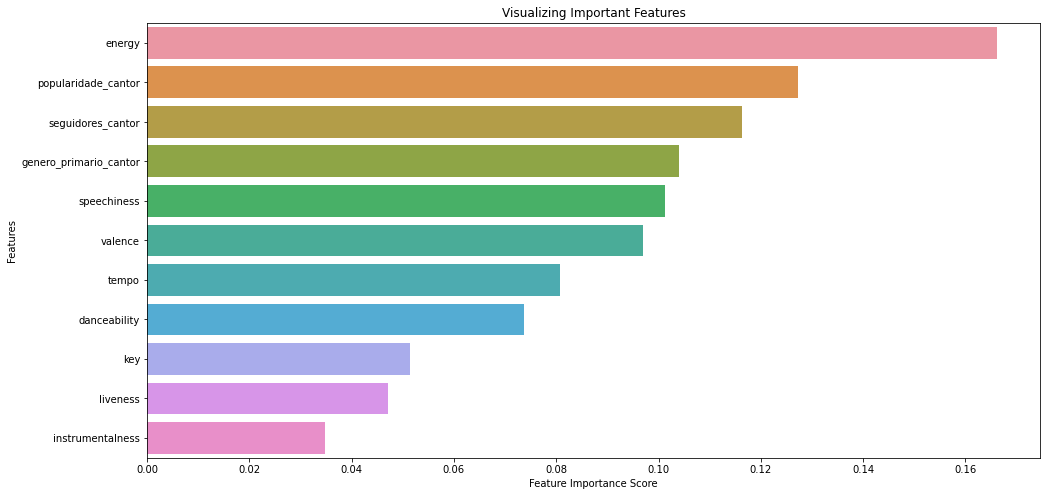

In [297]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()
    
visualiza_features_importantes(feature_imp)

In [298]:
print("Número de árvores da floresta: {}".format(len(rf.estimators_)))
print("Árvores floresta gerada:")
for tree in rf.estimators_:
    print("\nNumero de nós: {}".format(tree.tree_.node_count))
    print("Profundidade da árvore: {}".format(tree.tree_.max_depth))
    print("Features importantes: {}".format(tree.feature_importances_))
    print("\nObjeto: {}".format(tree))

Número de árvores da floresta: 100
Árvores floresta gerada:

Numero de nós: 67
Profundidade da árvore: 10
Features importantes: [0.10094267 0.14982626 0.09381775 0.17129945 0.         0.01085108
 0.1185207  0.05891148 0.04370818 0.18916225 0.06296018]

Objeto: DecisionTreeClassifier(max_depth=10, max_features='auto',
                       random_state=209652396)

Numero de nós: 83
Profundidade da árvore: 10
Features importantes: [0.06685055 0.05212768 0.06431058 0.04319163 0.19279349 0.05881117
 0.0440563  0.26888071 0.         0.12144269 0.08753521]

Objeto: DecisionTreeClassifier(max_depth=10, max_features='auto',
                       random_state=398764591)

Numero de nós: 75
Profundidade da árvore: 10
Features importantes: [0.03367999 0.09456985 0.0465657  0.07151672 0.07117746 0.01386299
 0.         0.3387799  0.11370585 0.04631947 0.16982208]

Objeto: DecisionTreeClassifier(max_depth=10, max_features='auto',
                       random_state=924231285)

Numero de nós: 71
Pro

In [299]:
tree0 = rf.estimators_[0]

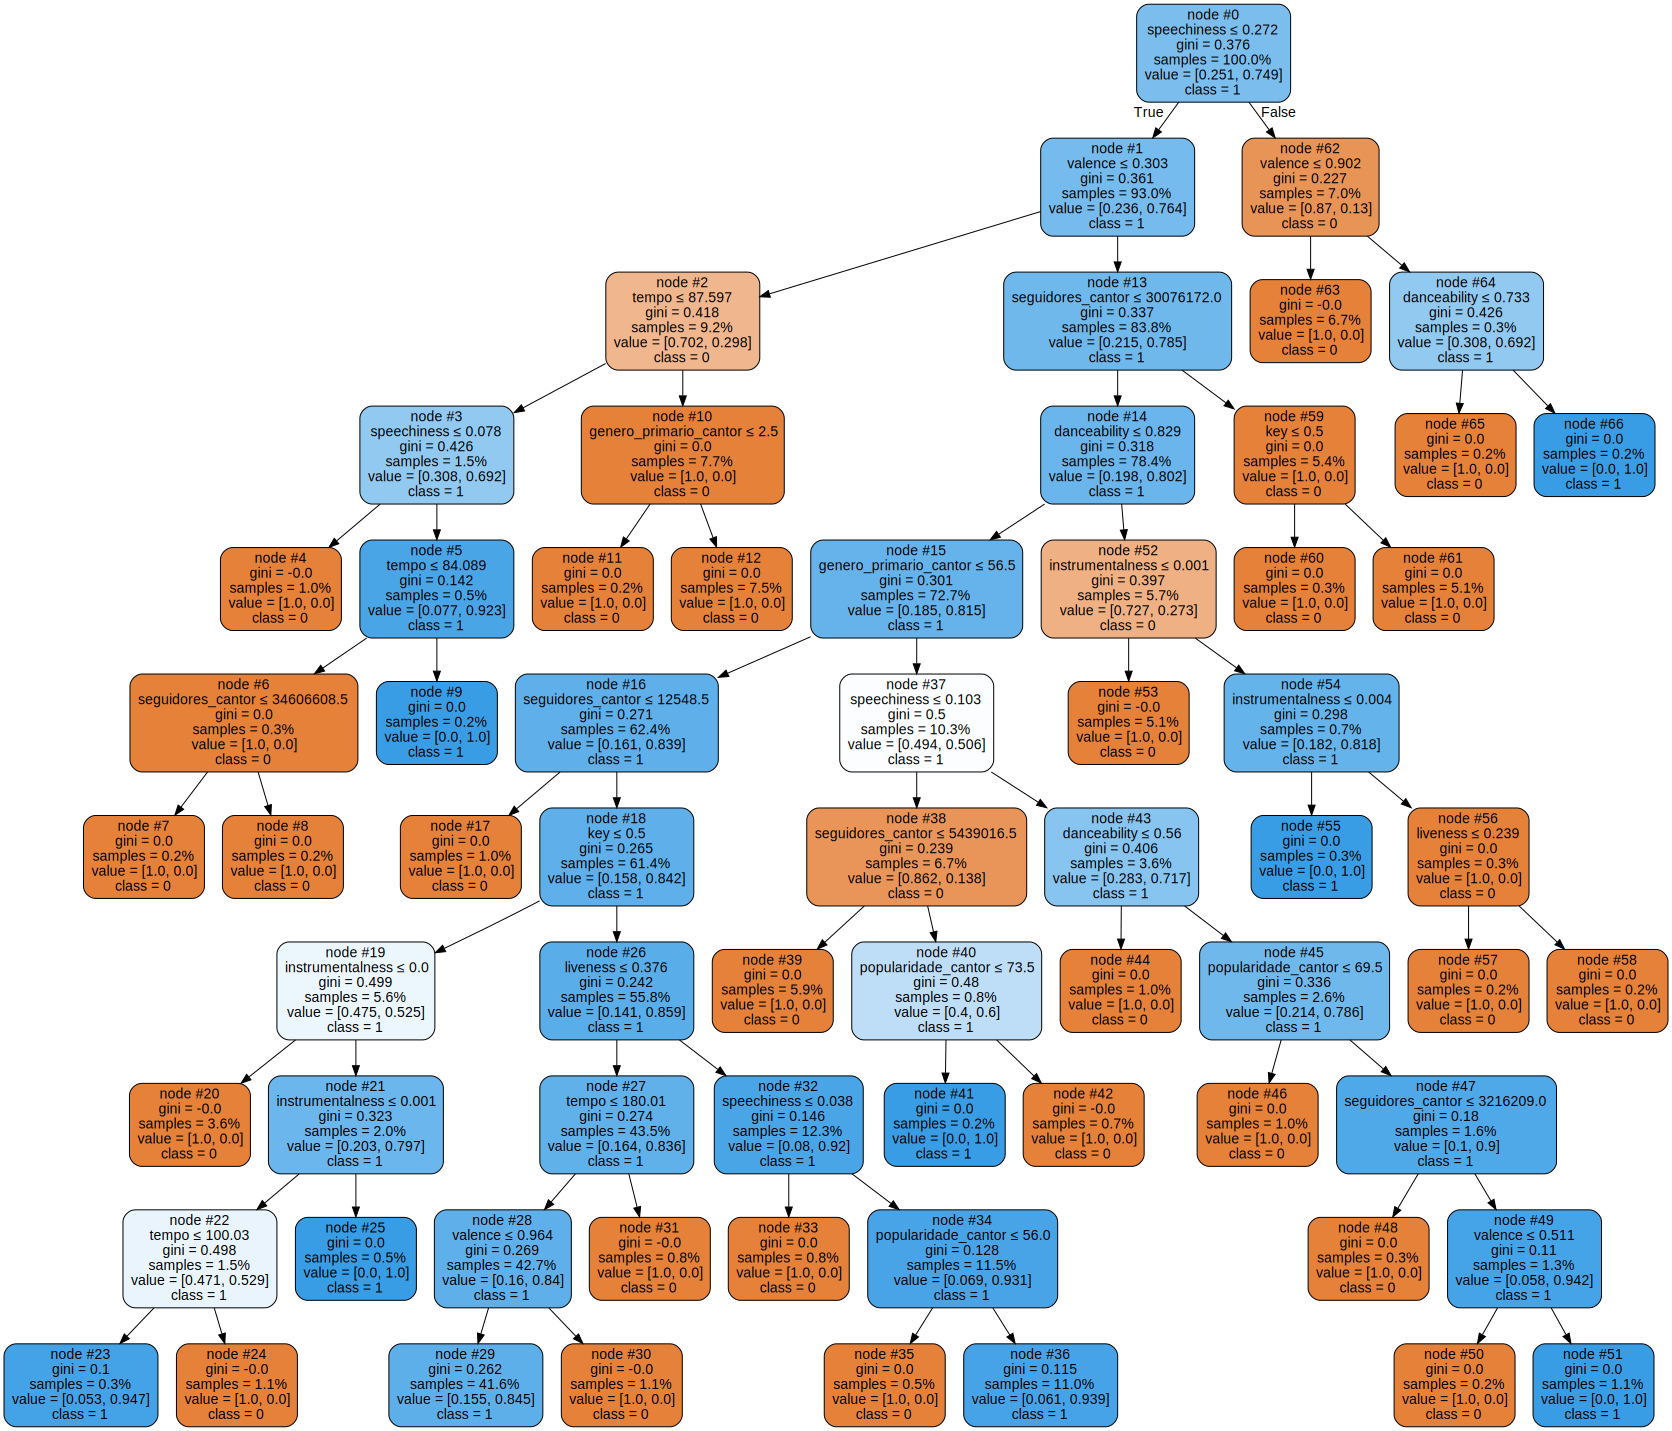

In [300]:
from sklearn.tree import export_graphviz
import graphviz 

dot_data = export_graphviz(
         tree0,
         max_depth=10,
         out_file=None,
         feature_names=features_names,
         class_names=['0','1'], 
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

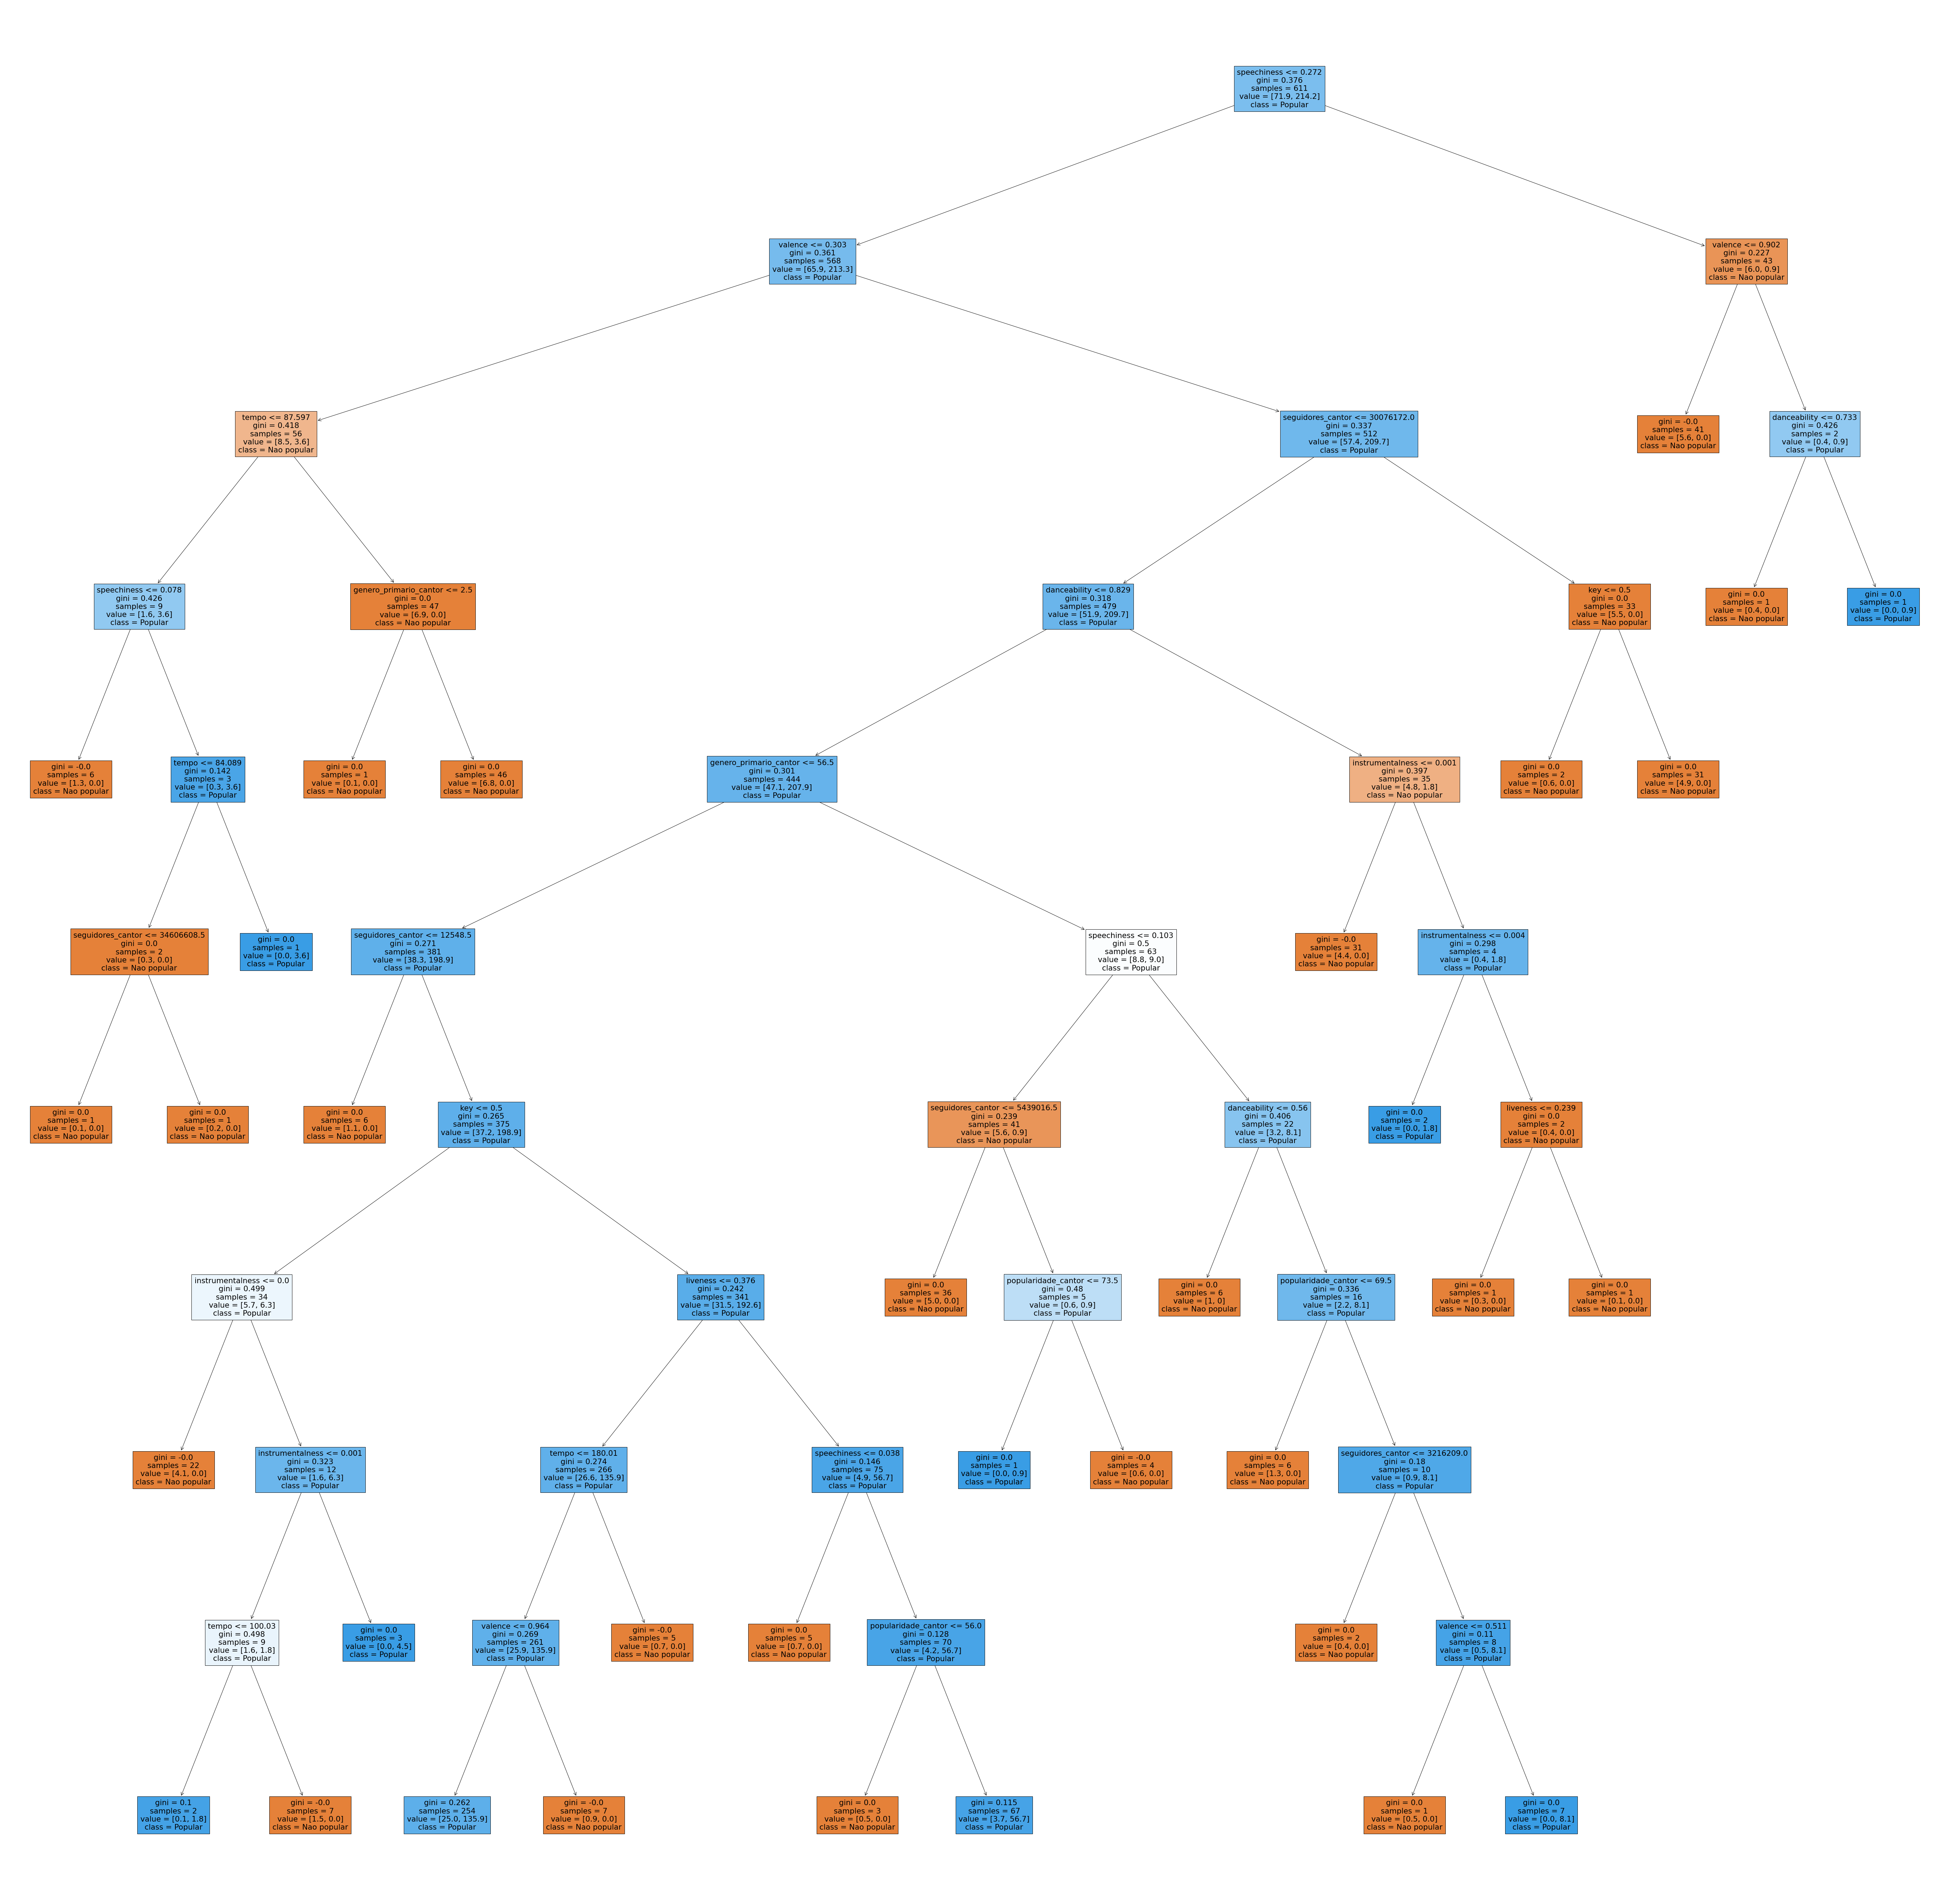

In [301]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

text_representation = tree.export_text(tree0)

fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(tree0, 
                   feature_names=features_names,  
                   class_names=class_names,
                   filled=True)

# 9 Information Value